<a href="https://colab.research.google.com/github/Aida-pour/Aida-pour/blob/main/Customer_Personality_Segmentation_Version_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [6]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [7]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/DSSML-MIT/Making-Sense-Unstructured-Data/marketing_campaign.csv", sep="\t")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


## **Data Overview**

#### **Question 1:**: What are the data types of all the columns?

In [8]:
# Write your code here.

data.info()

#dtypes: float64(1), int64(25), object(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [9]:
# Write your code here
data.describe()
avarage_income = data['Income'].mean()
print(f"The average household income is: ${avarage_income:.2f}")
#Based on the statistical summary, the average household income is approximately $52,247.25.

The average household income is: $52247.25


##### **Observations:**

In [10]:
# Write your code here
#checking missing values
print("Missing values before treatment:")
print(data.isnull().sum())

# Treat missing values in 'Income' by imputing the mean
data['Income'].fillna(data['Income'].mean(),inplace=True)
print("Missing values after teartmeant")
print(data.isnull().sum())

# Verify that there are no more missing values in the 'Income' column
if data['Income'].isnull().any():
    print("There are still missing values in the 'Income' column.")
else:
    print("There are no more missing values in the 'Income' column.")



Missing values before treatment:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Missing values after teartmeant
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome          

##### **Observations:**

#### **Question 4**: Are there any duplicates in the data?

In [11]:
# Write your code here
#cheking is there is any duplicate row numnbers
print("Duplicate Row numbwes:", data.duplicated().sum())

Duplicate Row numbwes: 0


##### **Observations:**

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Exploring distribution of column:ID
Exploring distribution of column:Year_Birth
Exploring distribution of column:Income
Exploring distribution of column:Kidhome
Exploring distribution of column:Teenhome
Exploring distribution of column:Recency
Exploring distribution of column:MntWines
Exploring distribution of column:MntFruits
Exploring distribution of column:MntMeatProducts
Exploring distribution of column:MntFishProducts
Exploring distribution of column:MntSweetProducts
Exploring distribution of column:MntGoldProds
Exp

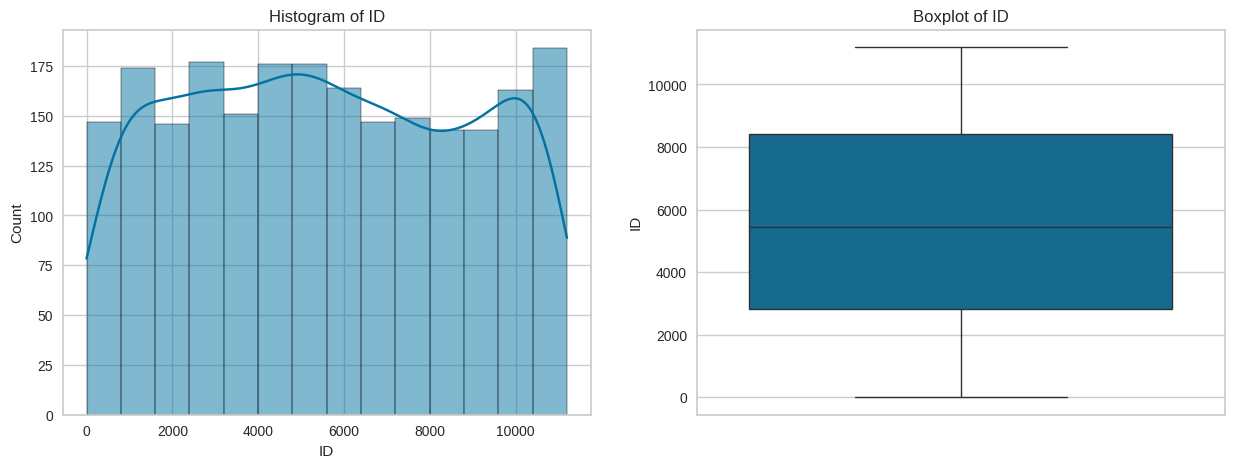

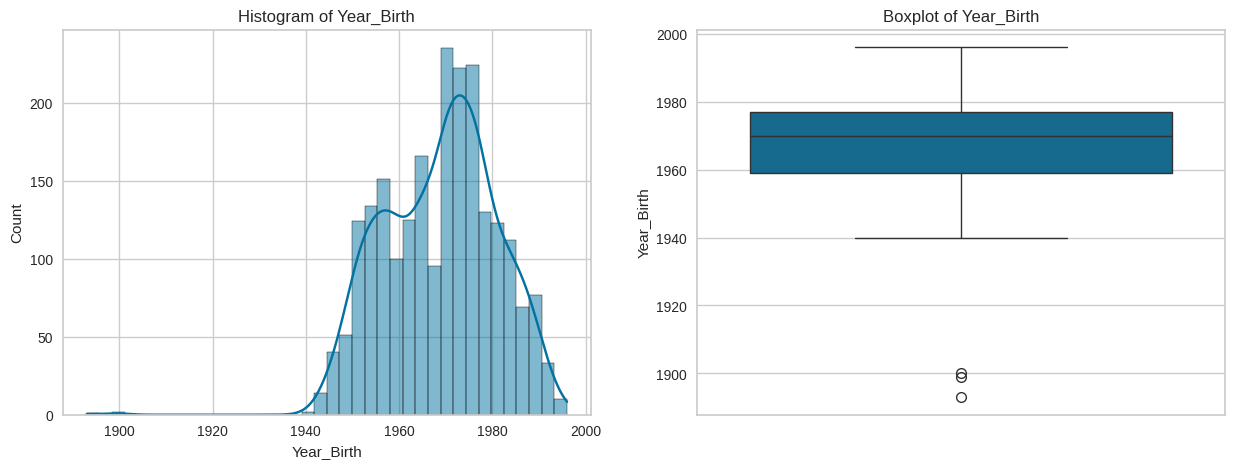

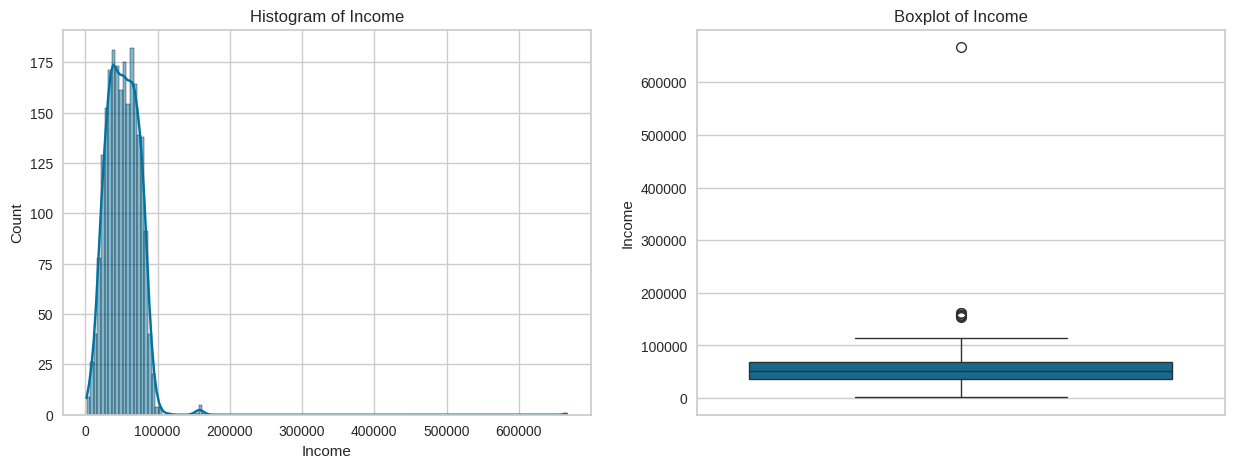

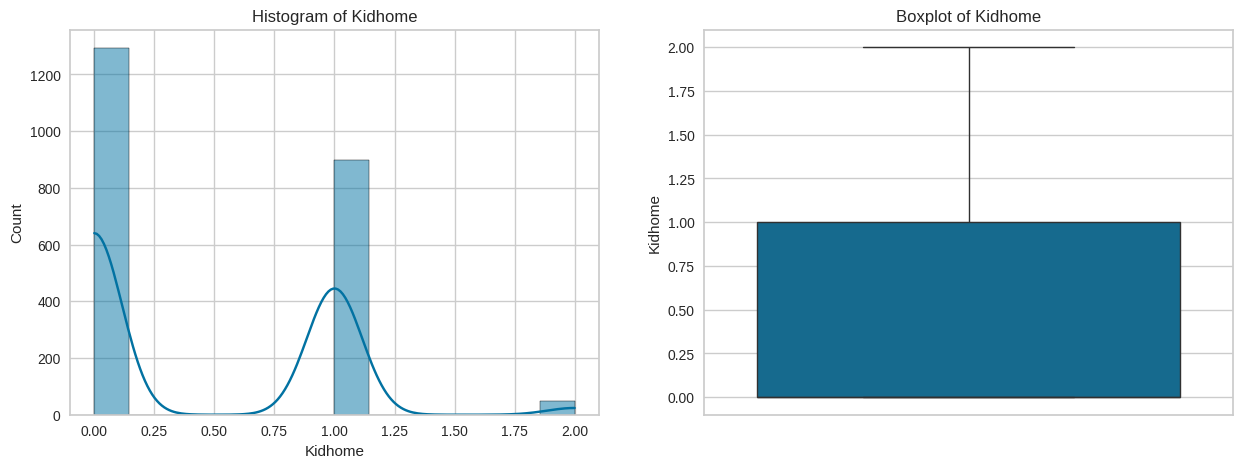

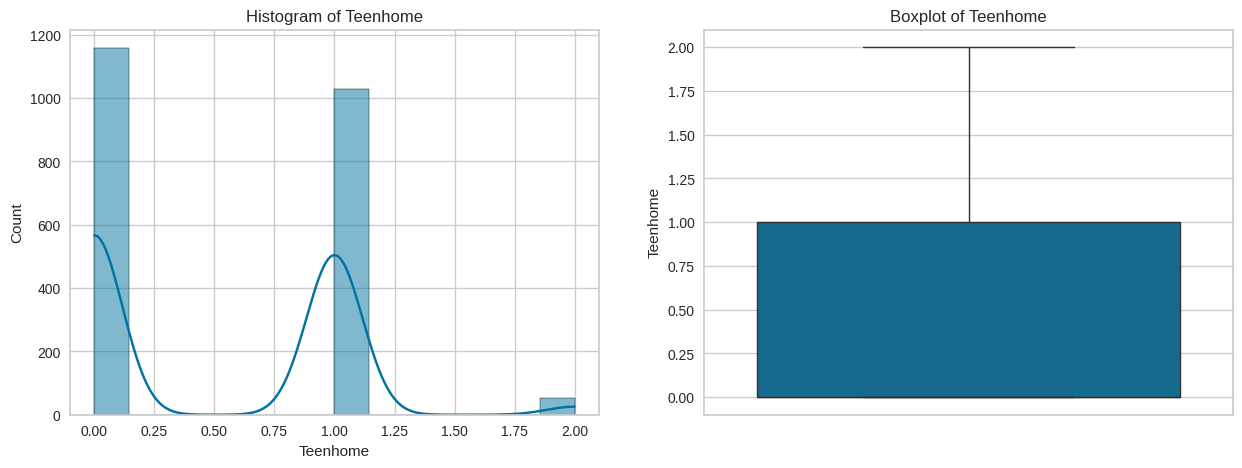

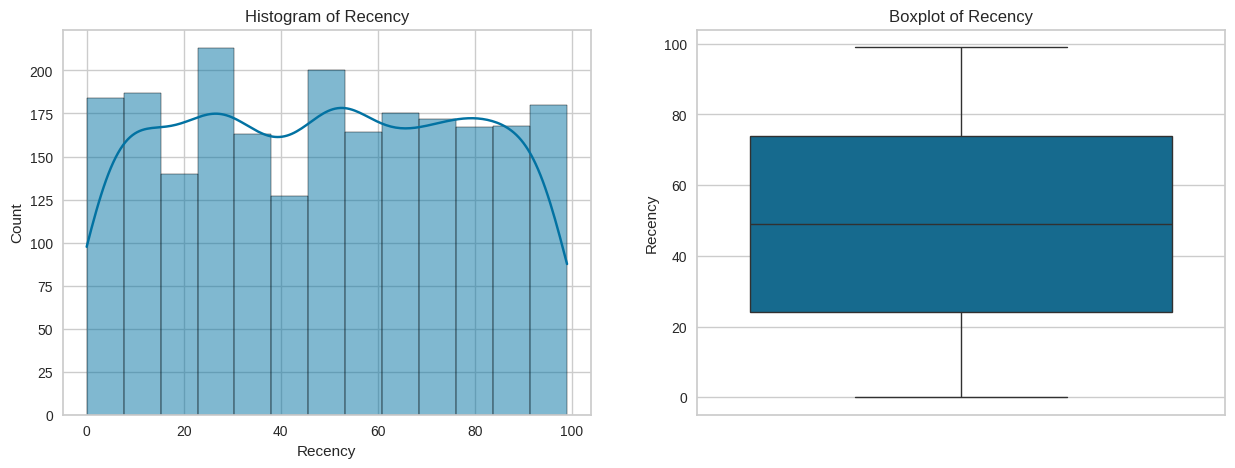

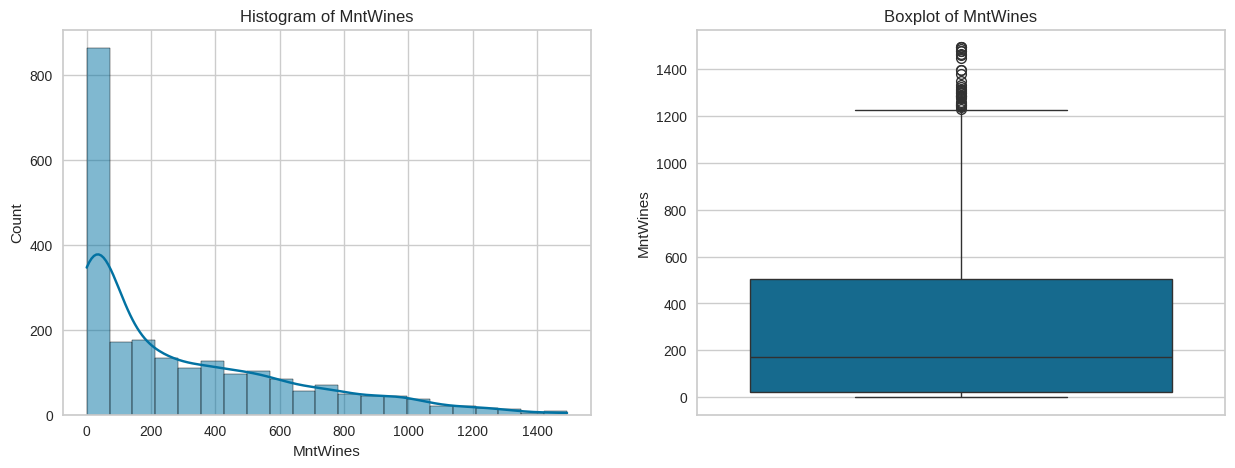

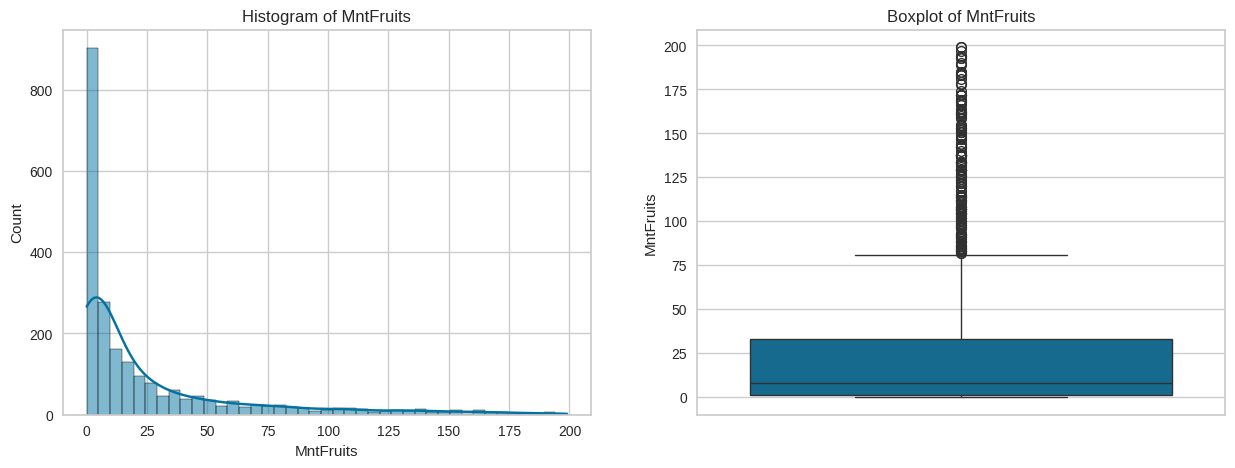

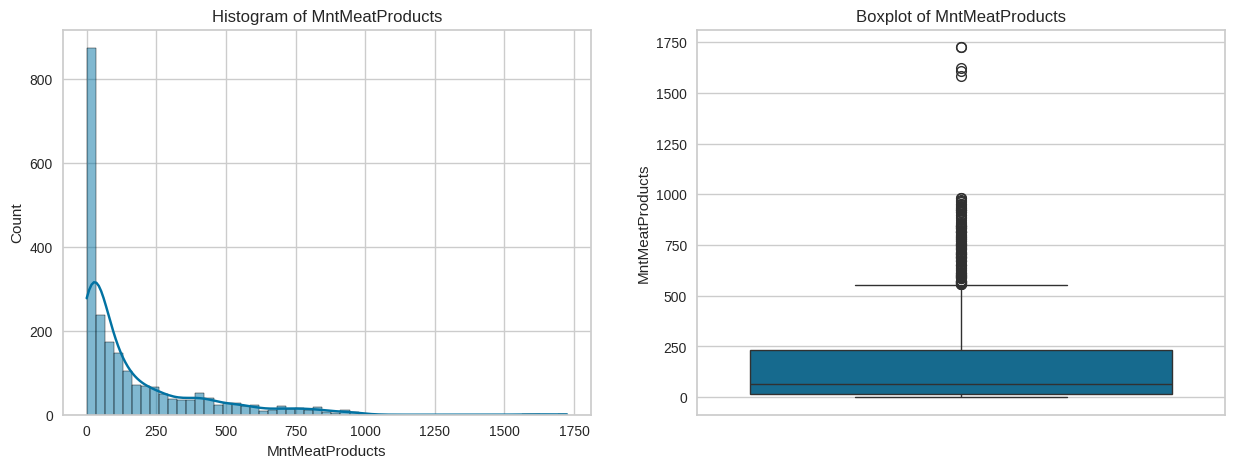

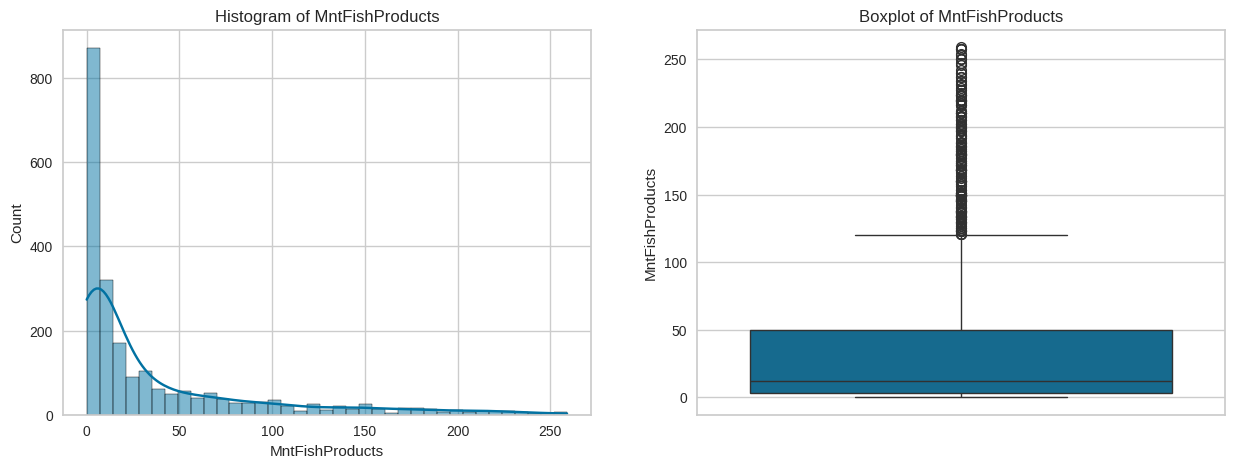

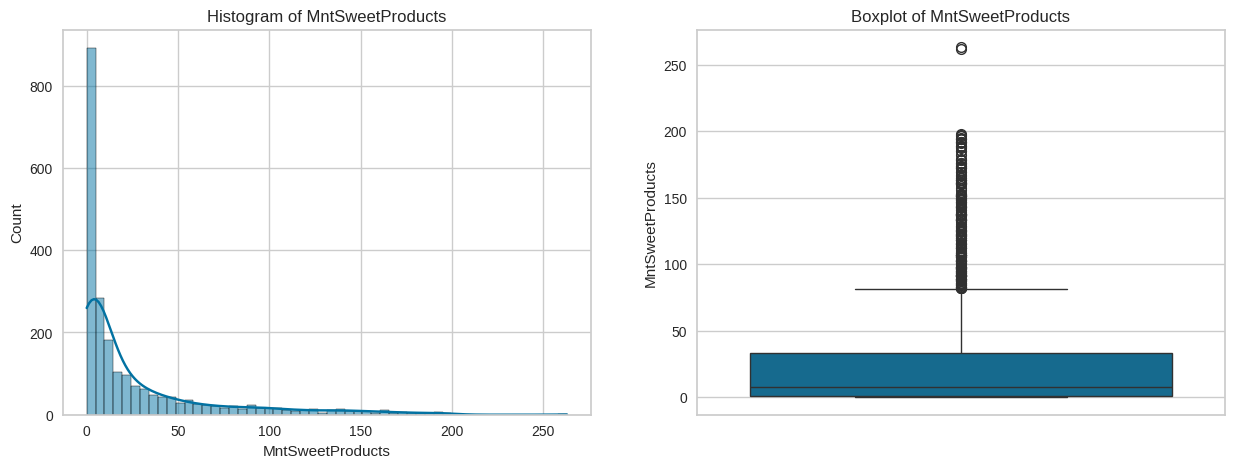

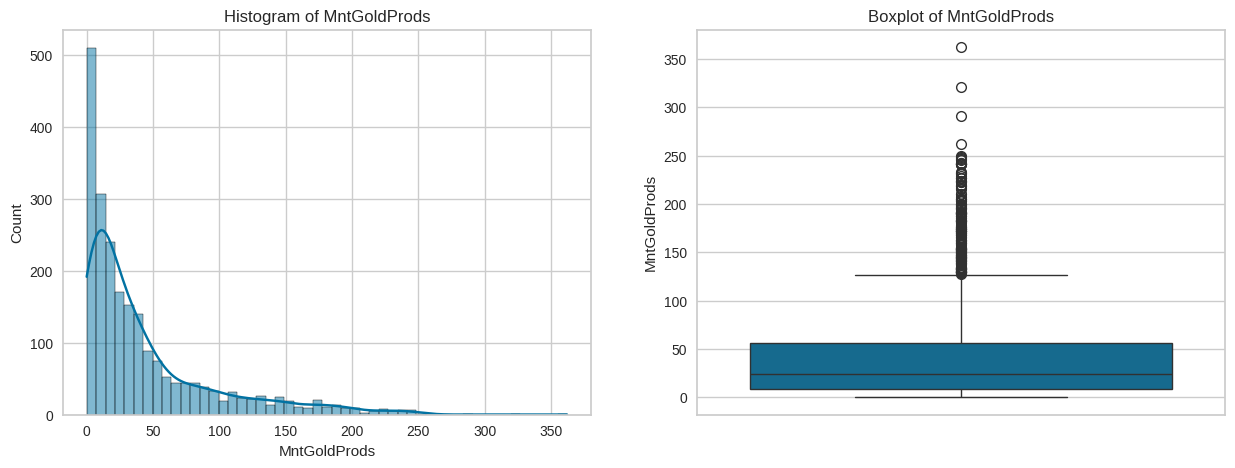

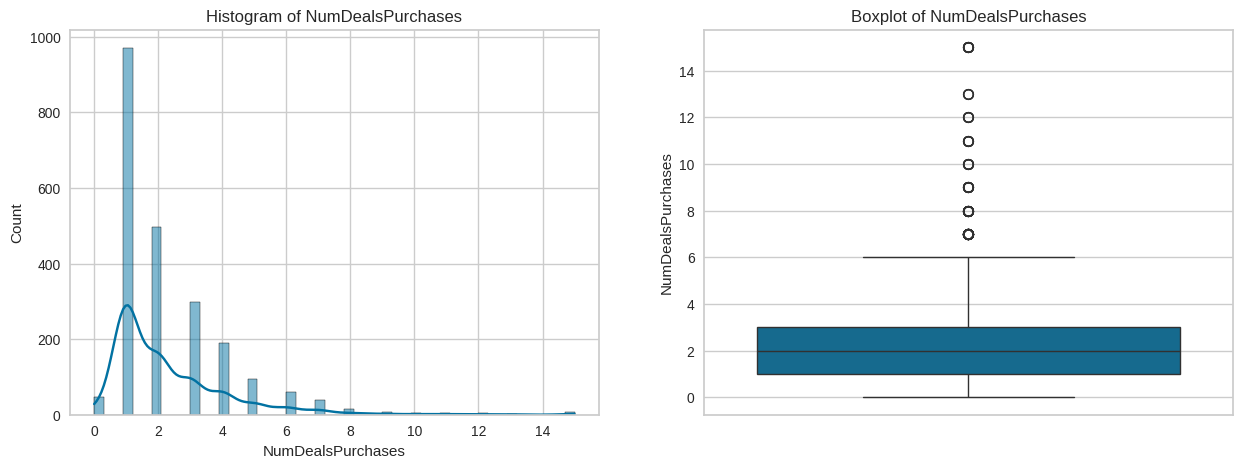

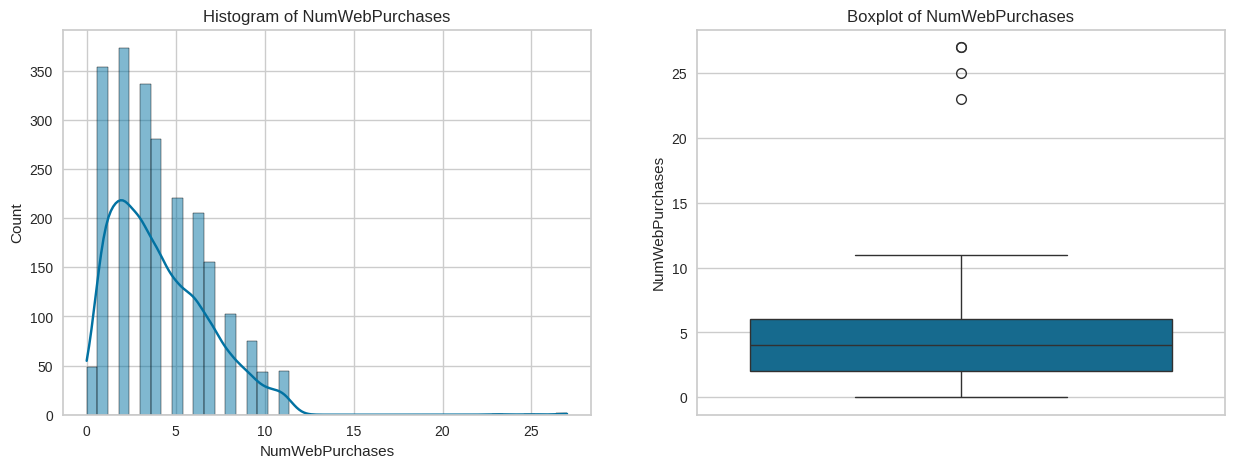

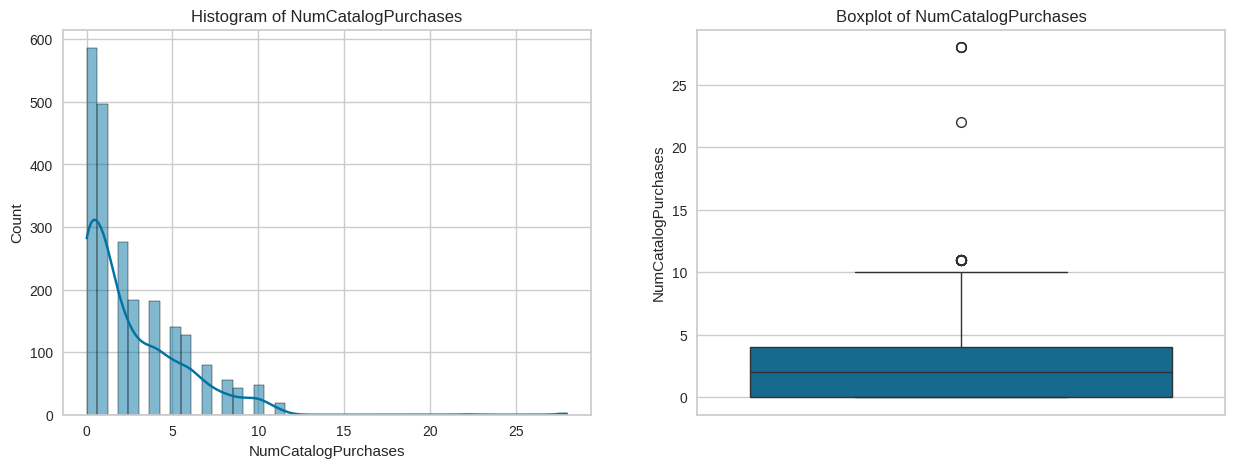

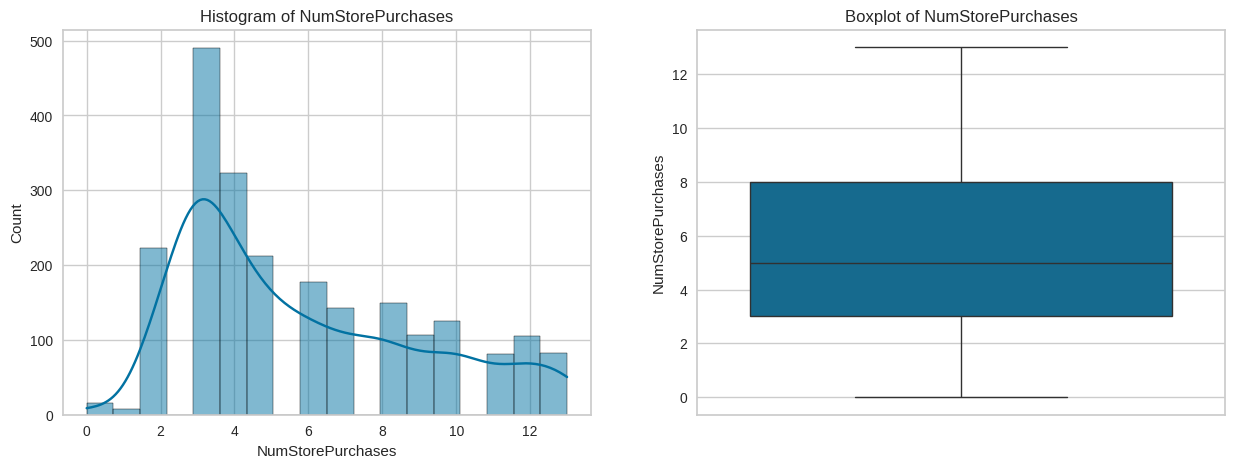

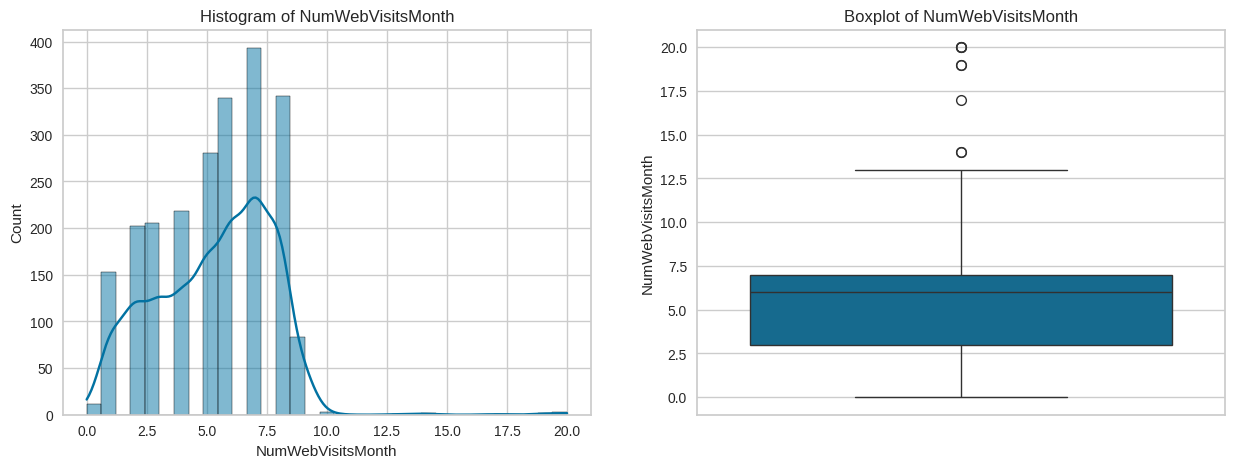

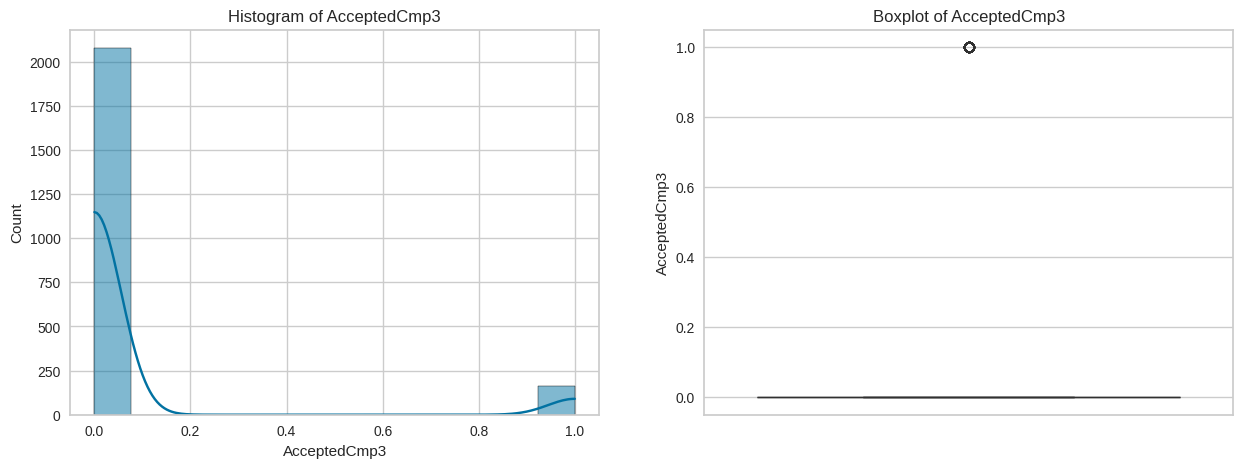

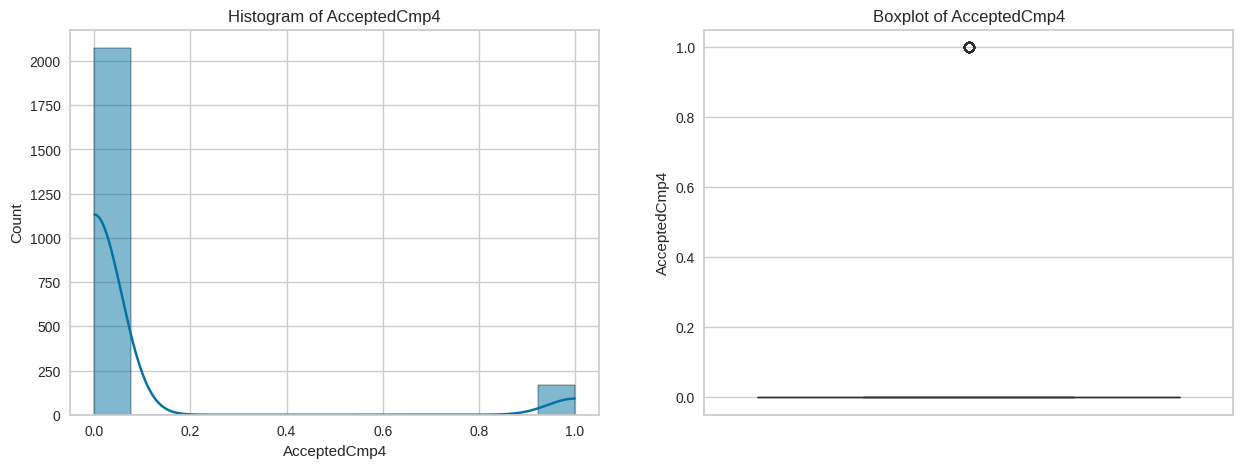

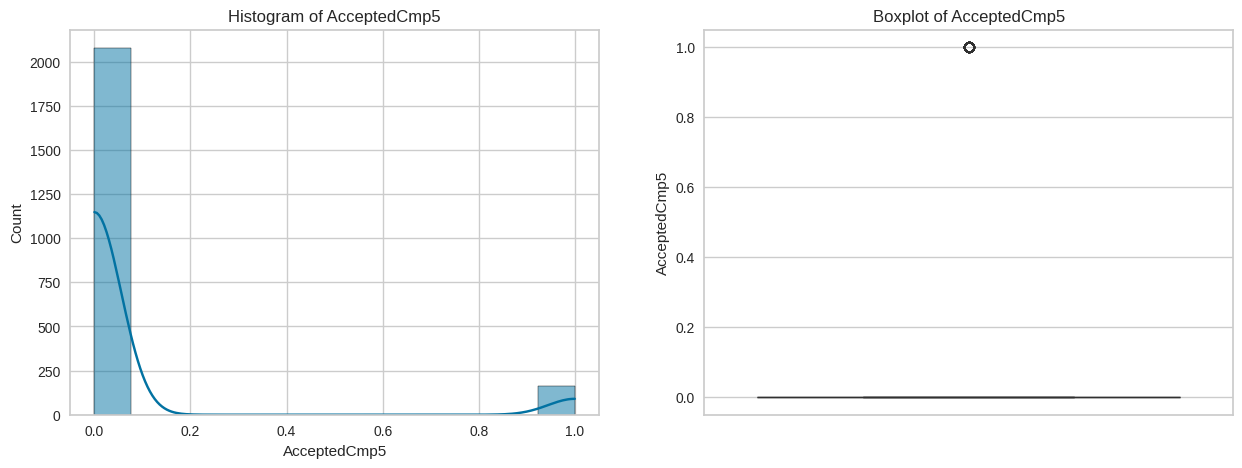

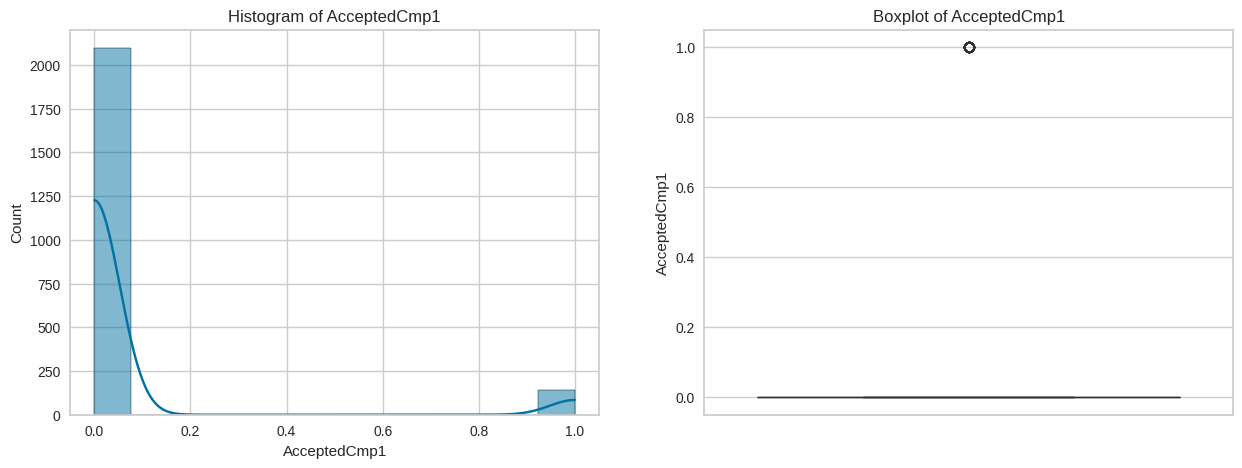

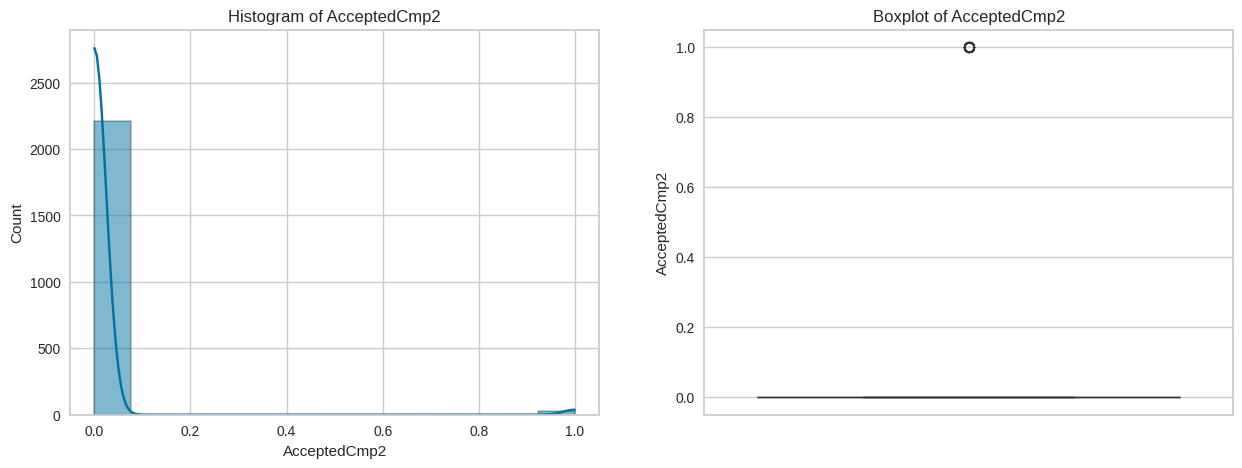

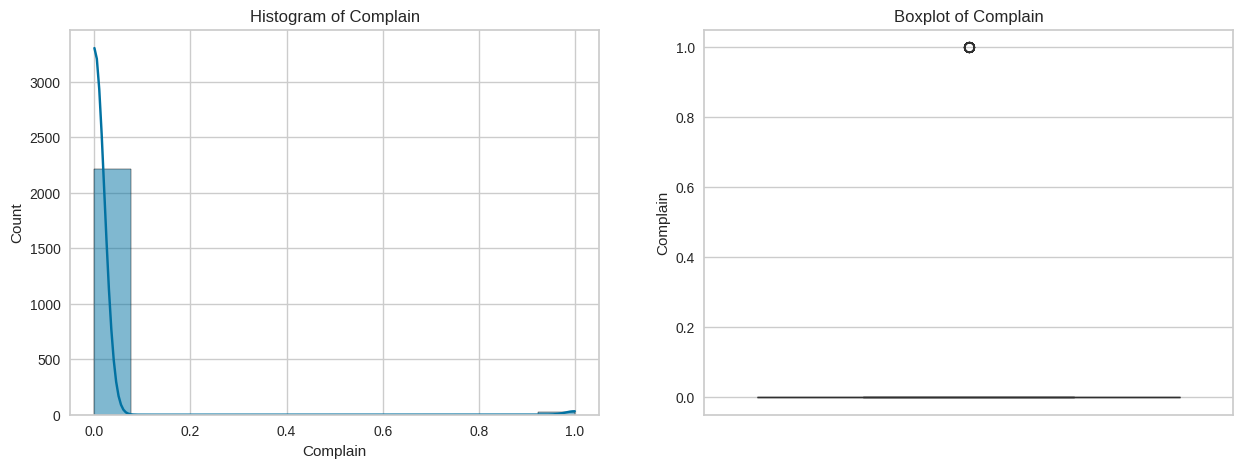

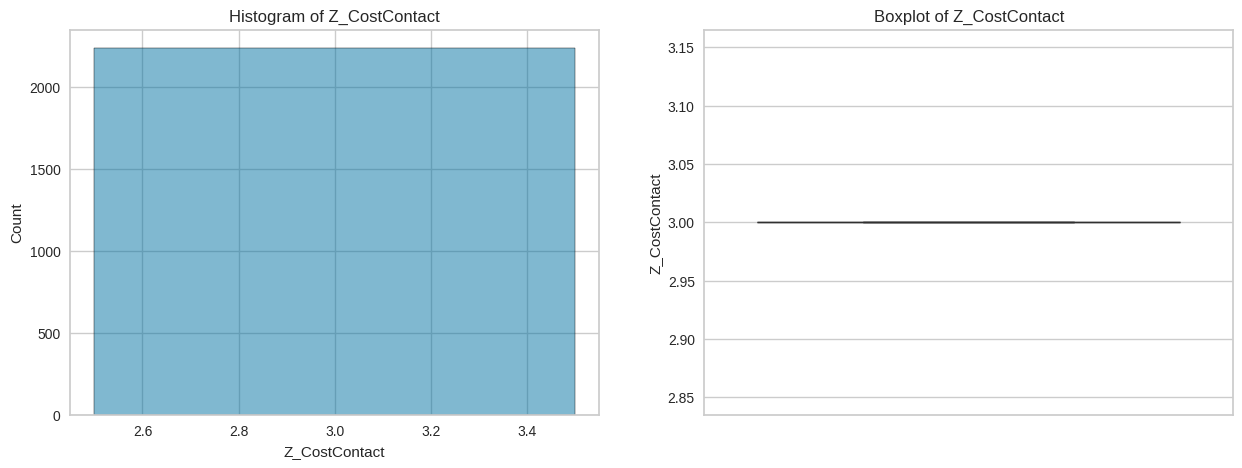

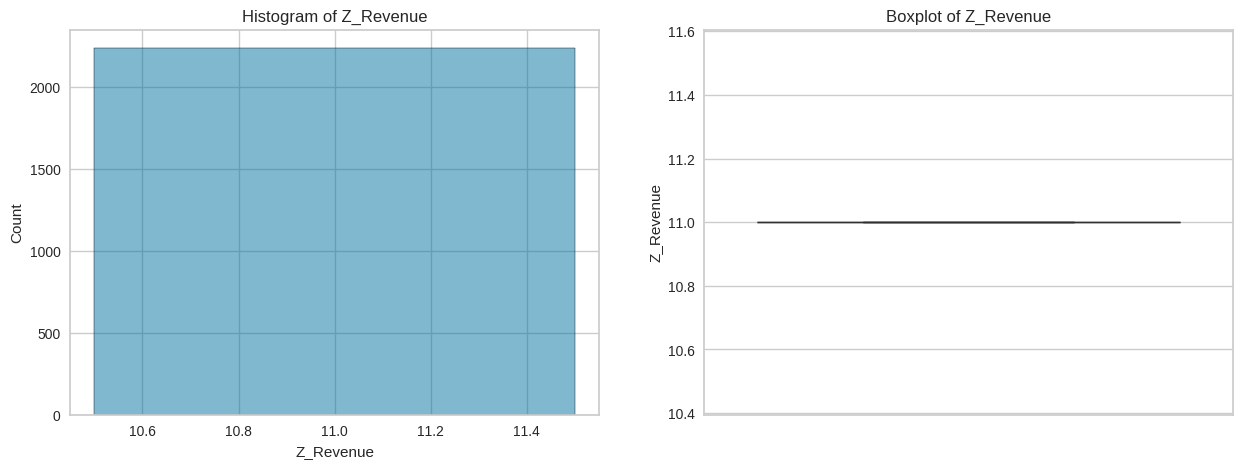

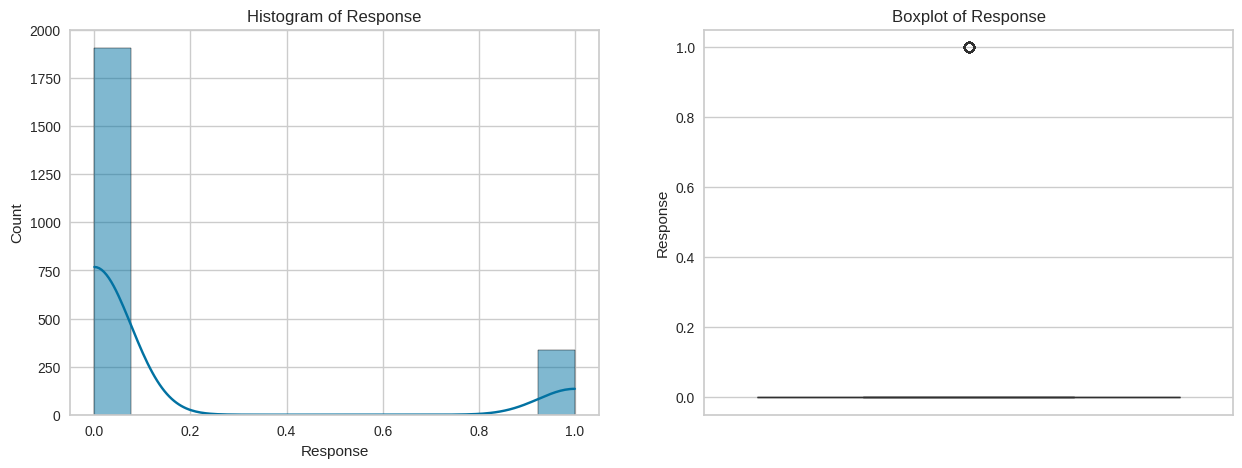

In [15]:
# Write your code here
#select numerical columns for visulization
mumerical_cols = data.select_dtypes(include=np.number).columns
print(mumerical_cols)
#dtype='object')

#iterate through numerical columns and plot histogram and bxplots
for col in mumerical_cols:
  print(f"Exploring distribution of column:{col}")
  plt.figure(figsize=(15,5))
  #histogram
  plt.subplot(1,2,1)
  sns.histplot(data[col],kde=True)
  plt.title(f'Histogram of {col}')
  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(y=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show


##### **Observations:**

#### Bivariate Analysis

####**Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

> Add blockquote



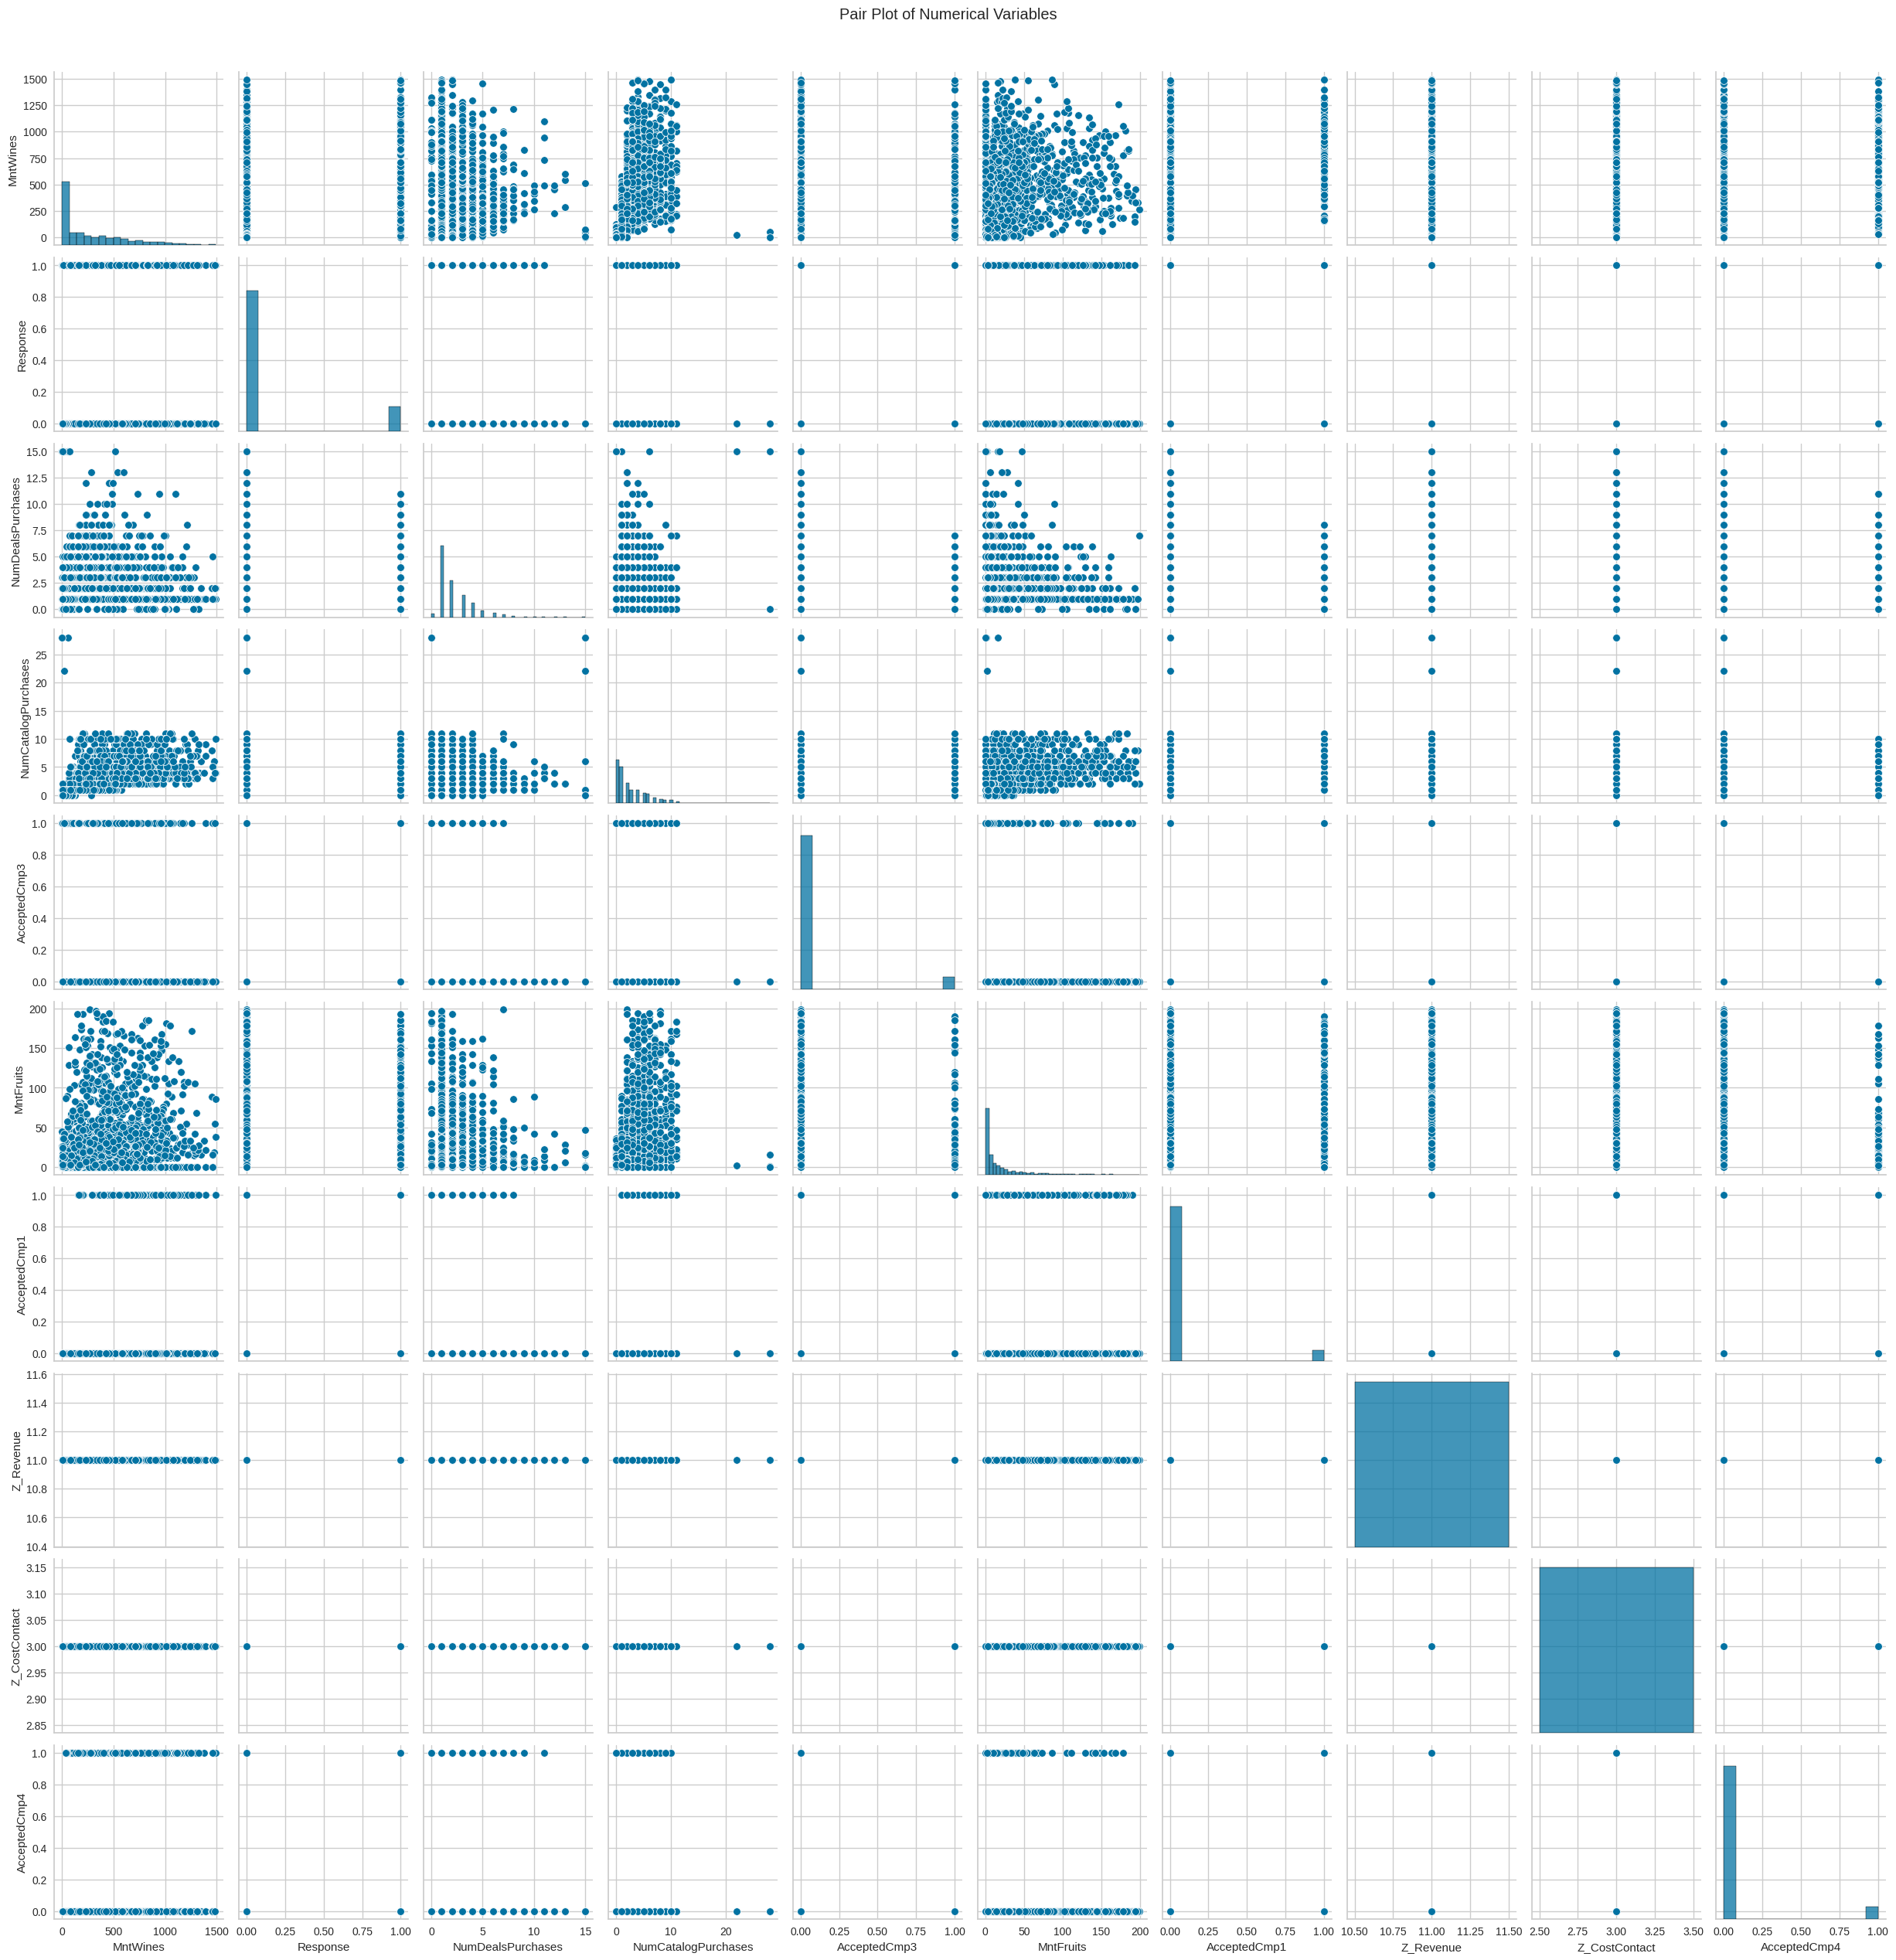

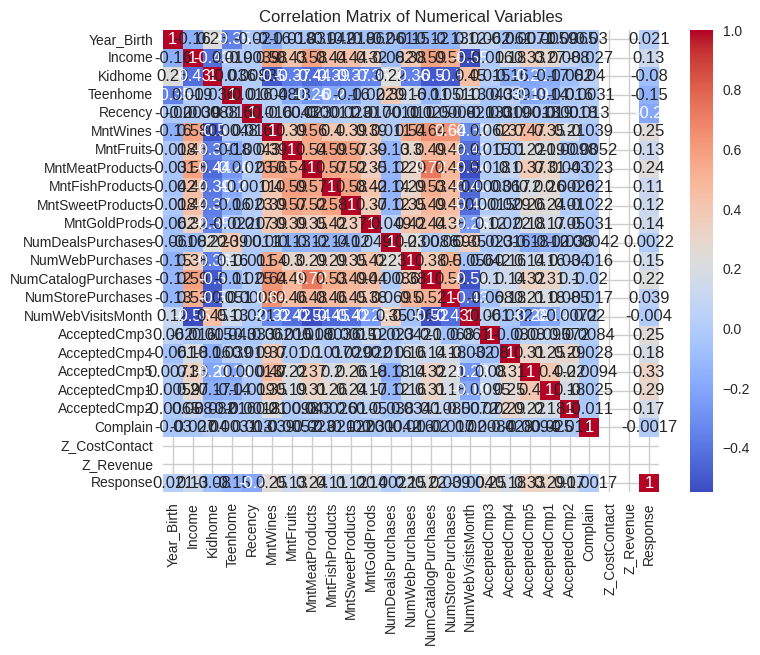

In [23]:
# Write your code here

# Select numerical columns for multivariate analysis (excluding ID which is just an identifier)
numerical_cols_for_analysis = data.select_dtypes(include=np.number).columns.drop('ID')

# Create a pair plot for a subset of numerical columns (plotting all can be slow)
# You might want to select specific columns of interest or sample the data if it's too large
# Select a random sample of column names from the index
sampled_cols = numerical_cols_for_analysis.to_series().sample(min(10, len(numerical_cols_for_analysis)), axis=0).tolist()

sns.pairplot(data[sampled_cols])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

# Calculate and display the correlation matrix
plt.figure(figsize=(8, 10))
correlation_matrix = data[numerical_cols_for_analysis].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##### **Observations:**
*  Strong positive correlation found between MntWines, MntMeatProducts, and MntGoldProds.
*  Recency has weak or no correlation with most spending variables.
* Kidhome and Teenhome have low variance and weak relationships overall.




## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [31]:
# Write your code here

# Drop non-numeric columns and the ID column for clustering
data_for_clustering = data.select_dtypes(include=np.number).drop('ID', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Check the shape of the scaled data
print("Shape of scaled data:", scaled_data.shape)

Shape of scaled data: (2240, 25)


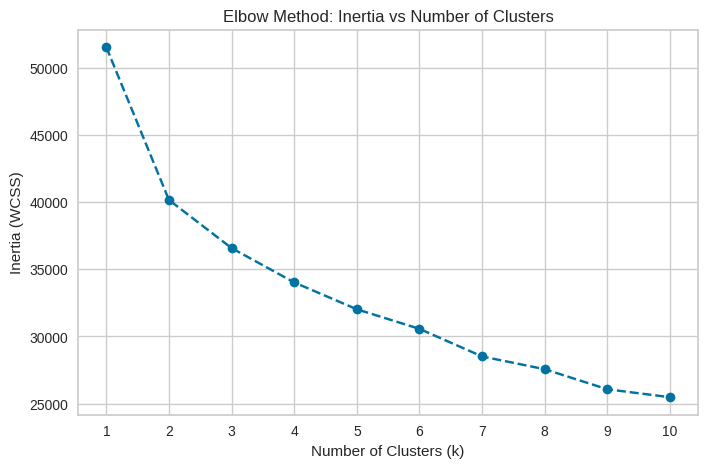

In [32]:
# Write your code here

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data) # Use the scaled_data from the previous cell
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

##### **Observations:**


*   From the elbow plot, the curve bends noticeably at k = 3, suggesting that 3 clusters is the optimal choice.



#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

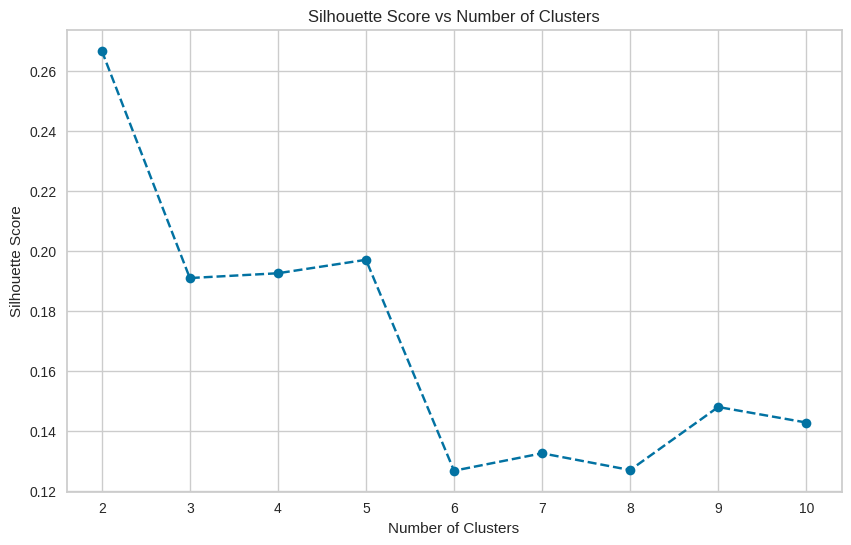

In [33]:
# Write your code here

# Calculate silhouette scores for different number of clusters
silhouette_scores = []
for i in range(2, 11): # Silhouette score is not defined for n_clusters = 1
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data) # Use the scaled_data
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

##### **Observations:**


*   Highest silhouette score is at k = 2 → ~0.265

Scores drop significantly after k = 2

From k = 3 to 5, the score stays around ~0.19–0.20 (moderate)

From k = 6 onward, scores are consistently lower (~0.13–0.15)






#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [34]:
# Write your code here

# Replace 'n_clusters_chosen' with the appropriate number of clusters based on your analysis of the elbow plot and silhouette scores
# Based on previous analysis, 2 or 3 clusters seem appropriate. Let's choose 3 for potentially richer segments.
n_clusters_chosen = 3

# Perform final K-means fit and measure time
import time

start_time = time.time()
kmeans_final = KMeans(n_clusters=n_clusters_chosen, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(scaled_data) # Use the scaled_data
end_time = time.time()

# Print the total time taken
print(f"Total time taken for K-means fit with {n_clusters_chosen} clusters: {end_time - start_time:.4f} seconds")

# The cluster labels are stored in kmeans_final.labels_
# We will add these labels to the original data in the next cell

Total time taken for K-means fit with 3 clusters: 0.0449 seconds


In [35]:
# Write your code here

# Adding predicted labels to the original data
# Assuming kmeans_final was fitted in the previous cell
data['Cluster'] = kmeans_final.labels_

# Display the first few rows with the new Cluster column
display(data.head())

# Check the number of observations in each cluster
print("\nNumber of observations in each cluster:")
print(data['Cluster'].value_counts())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0



Number of observations in each cluster:
Cluster
0    1046
2     648
1     546
Name: count, dtype: int64


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

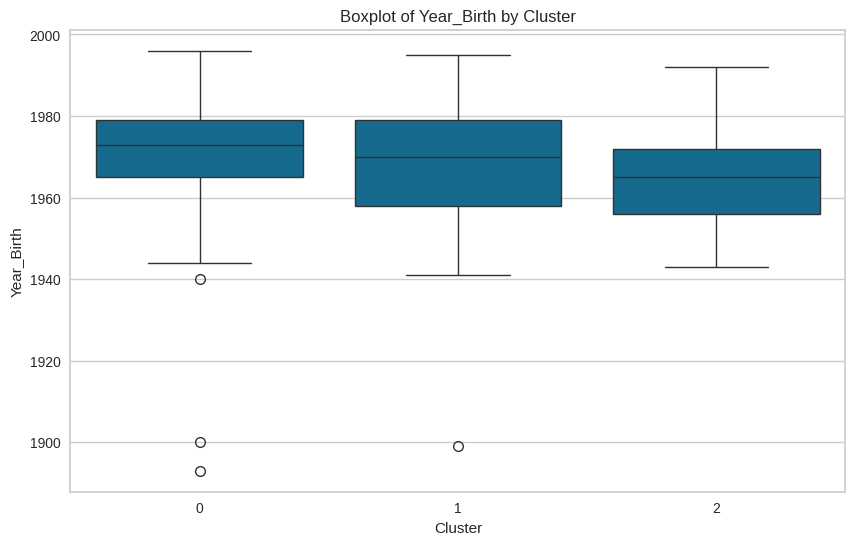

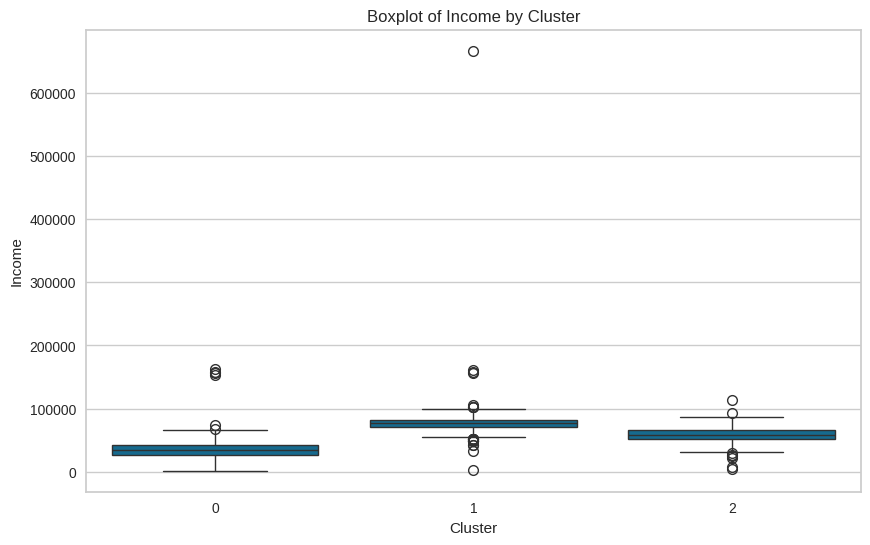

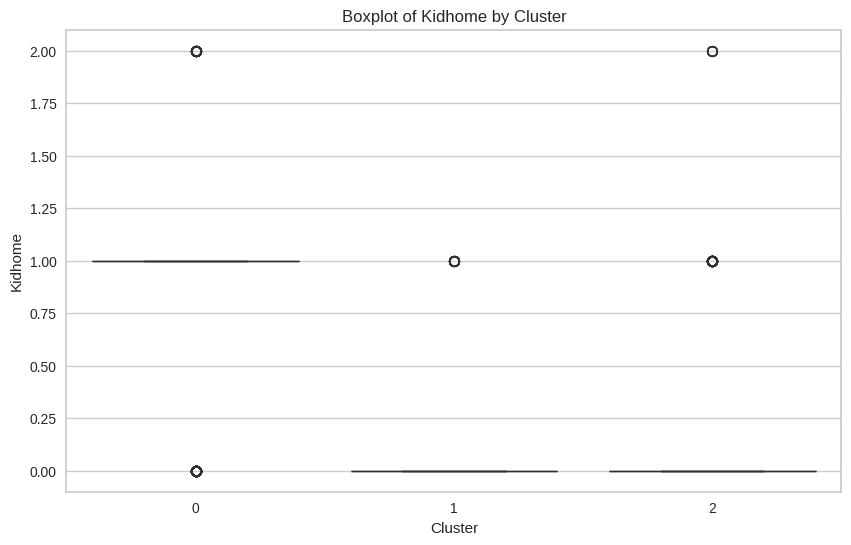

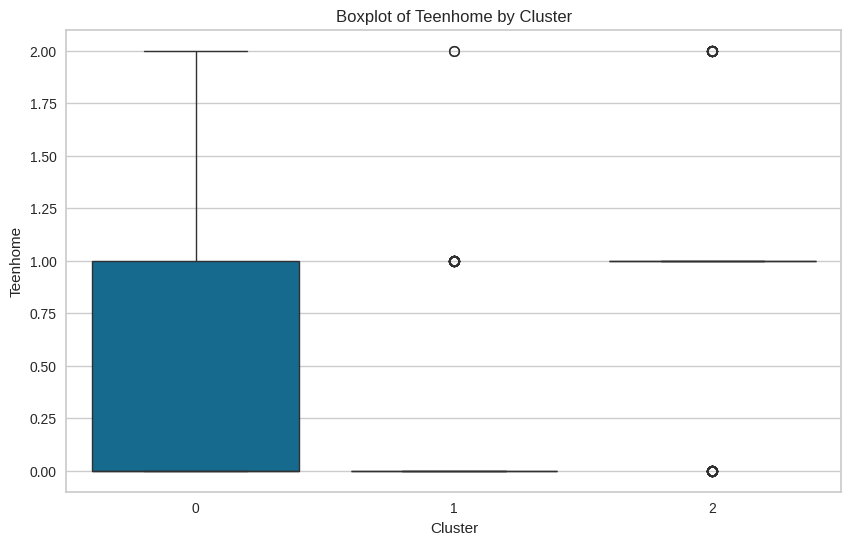

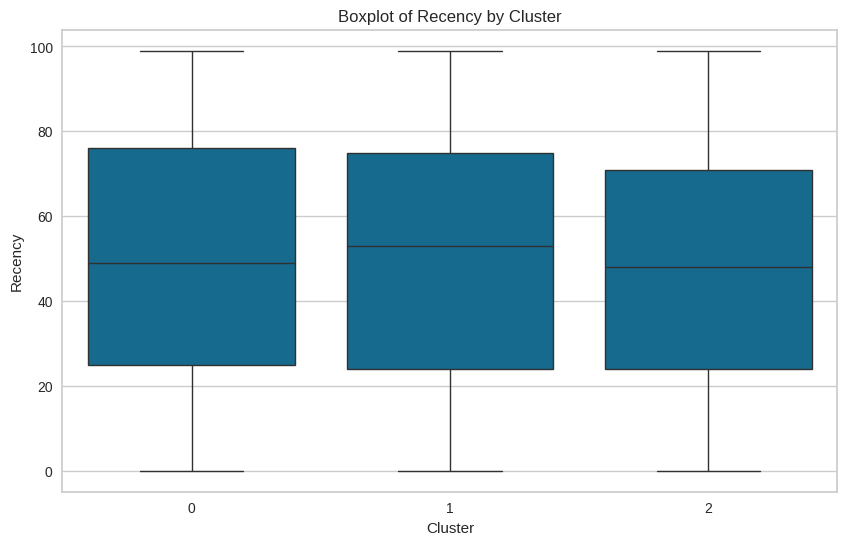

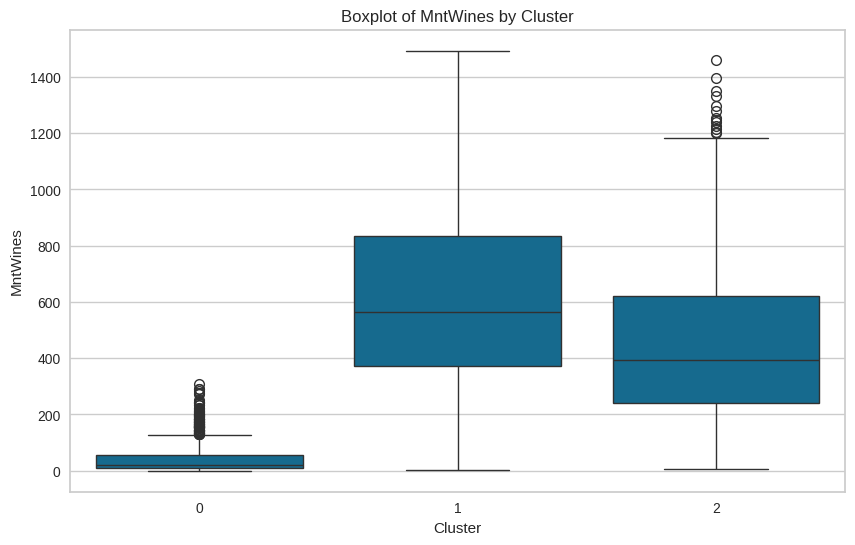

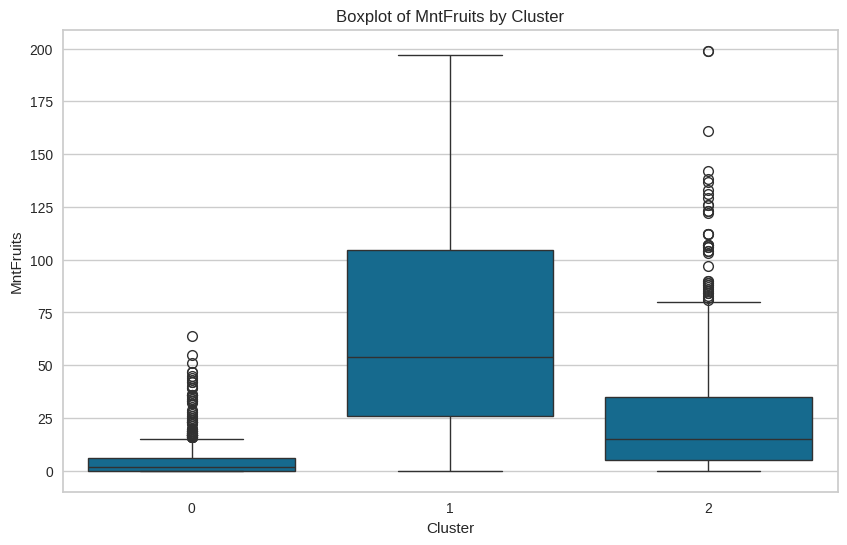

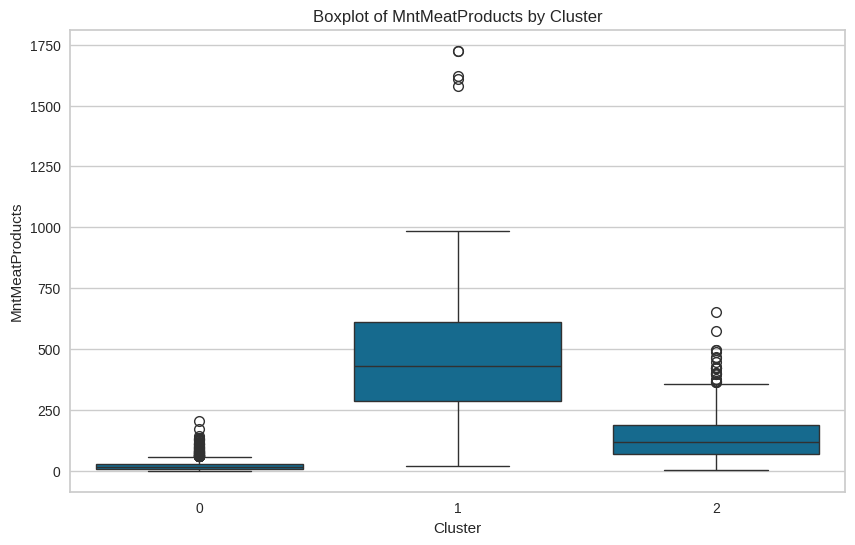

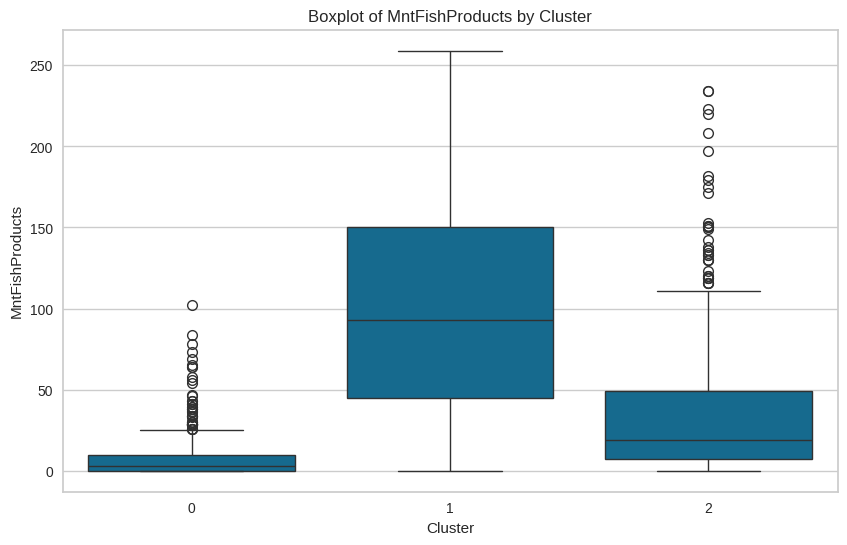

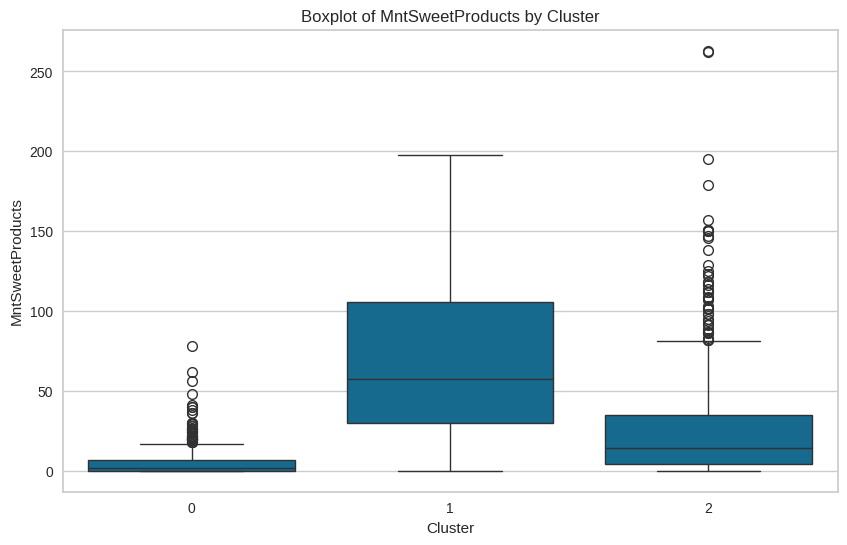

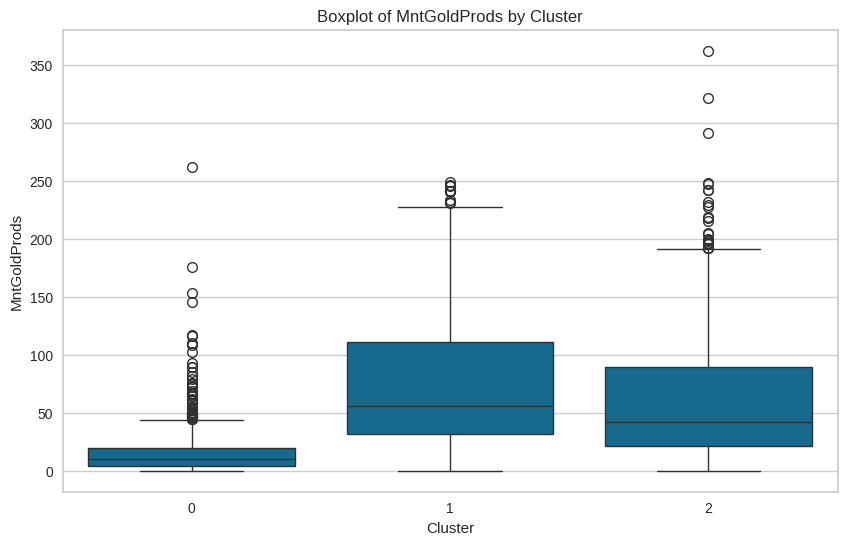

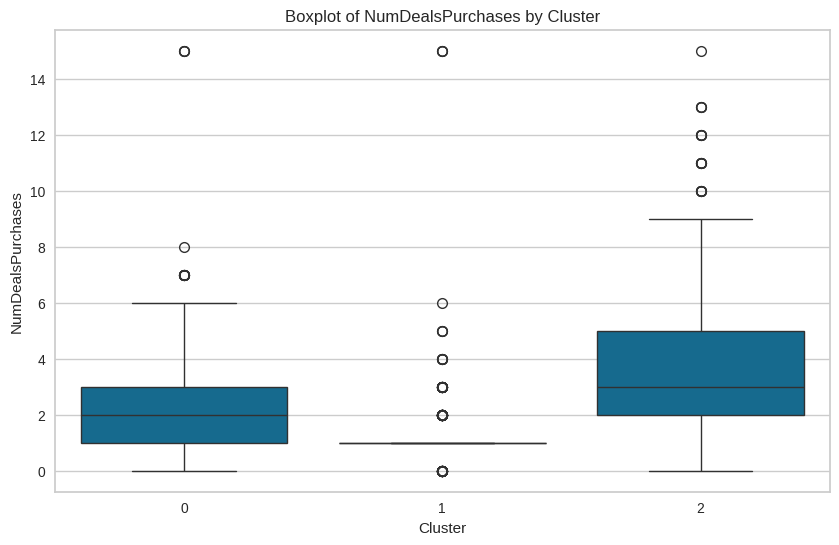

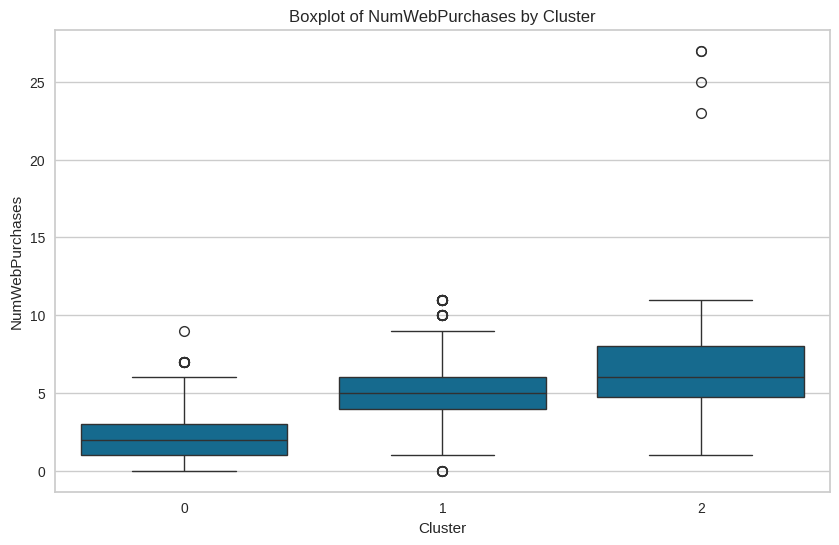

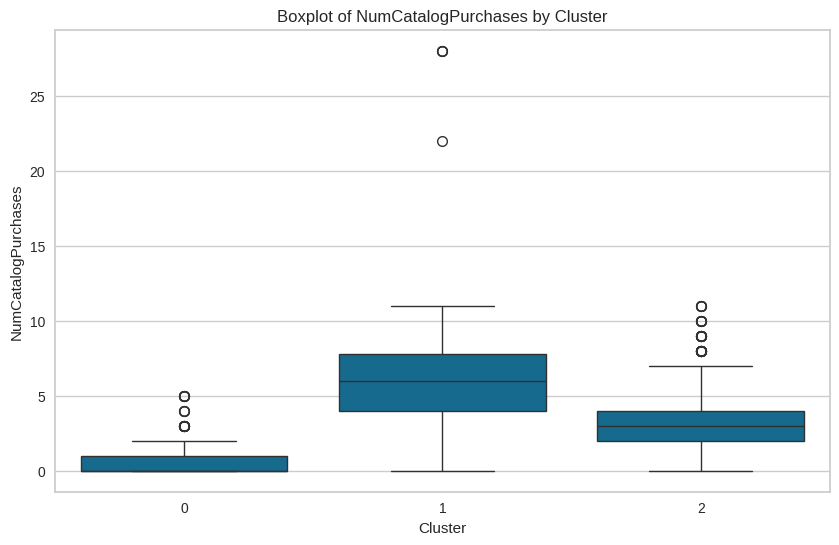

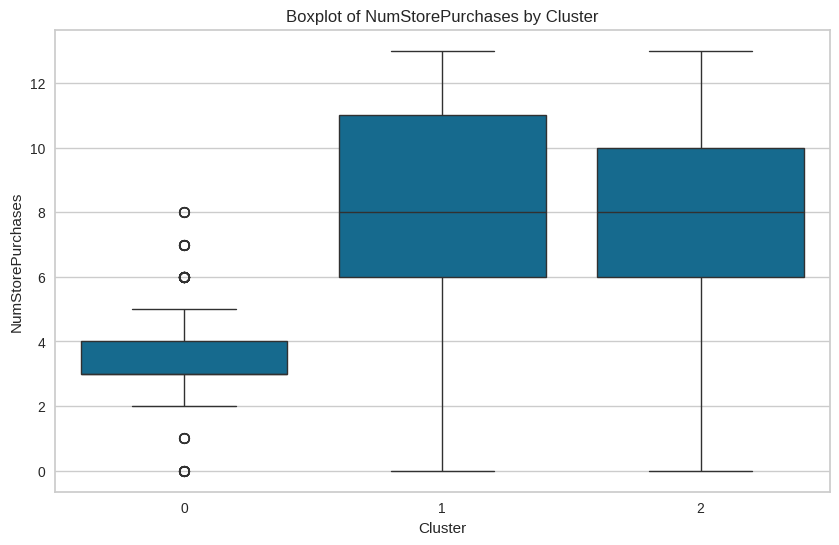

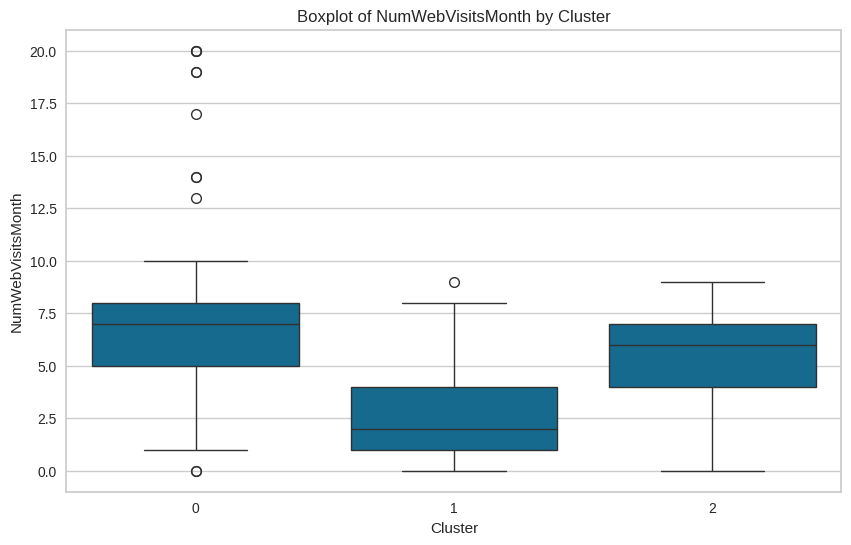

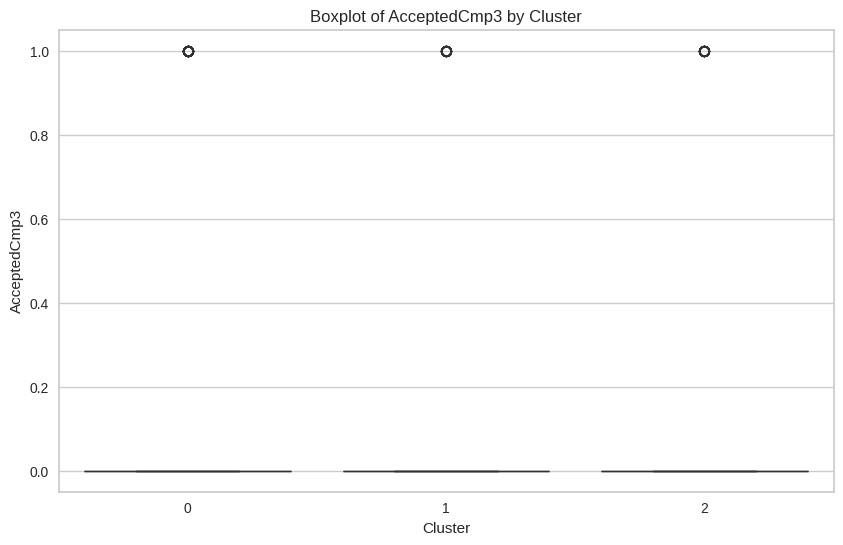

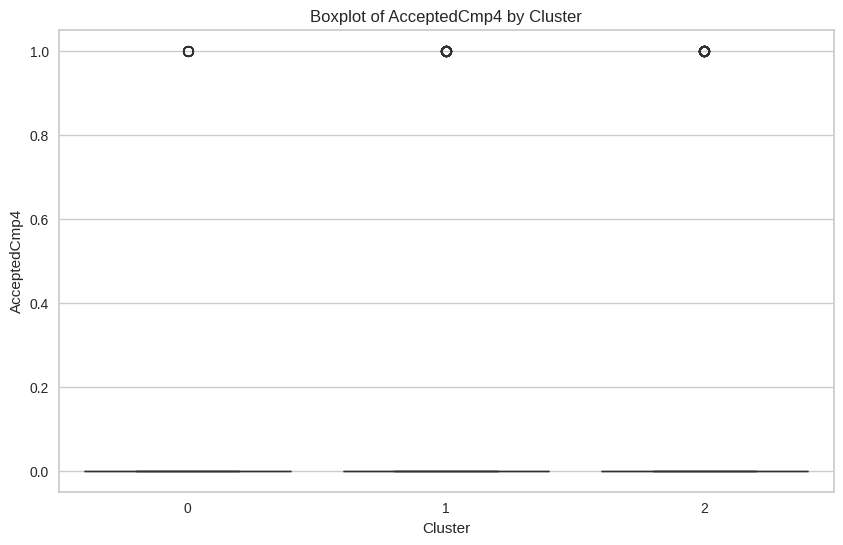

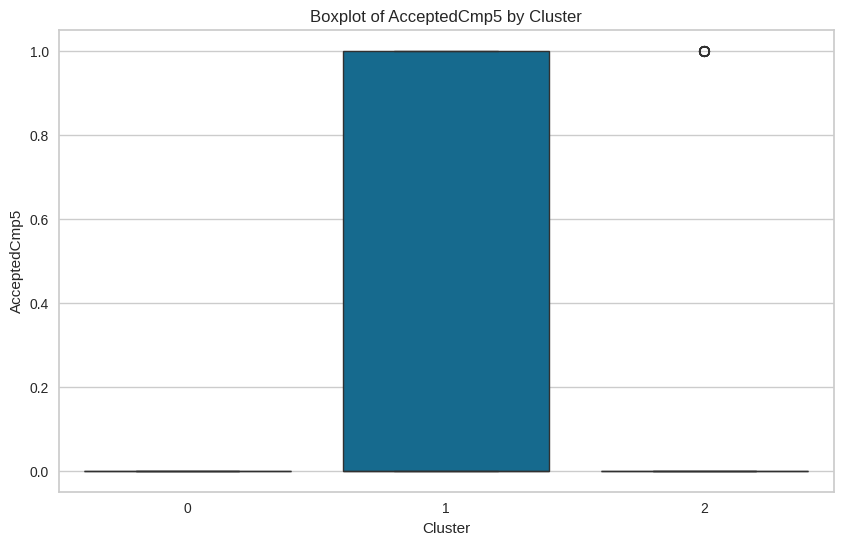

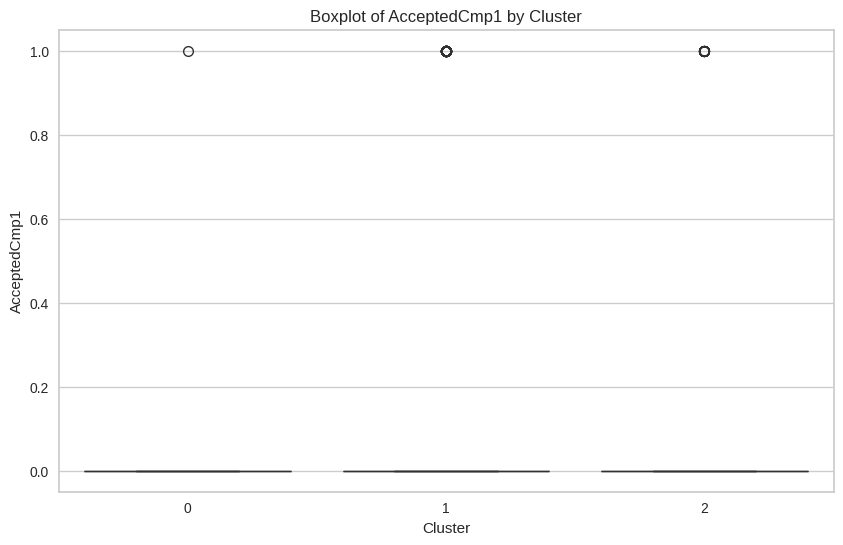

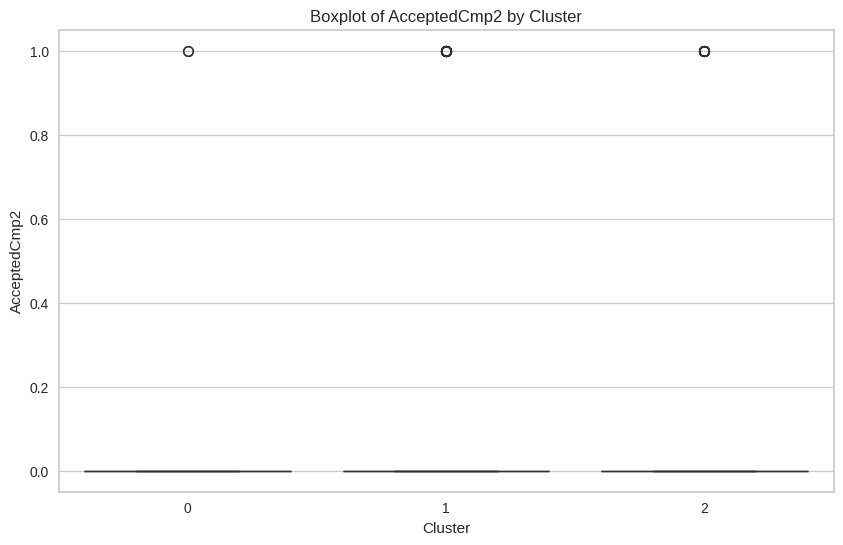

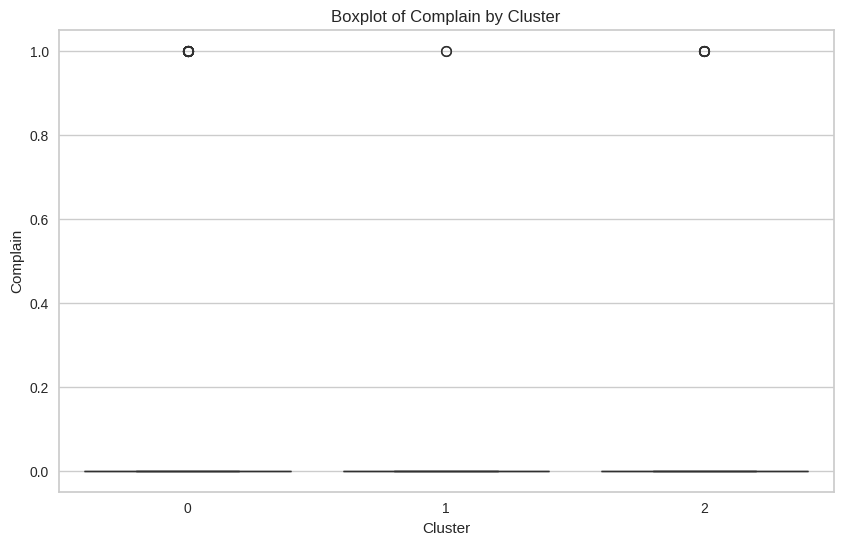

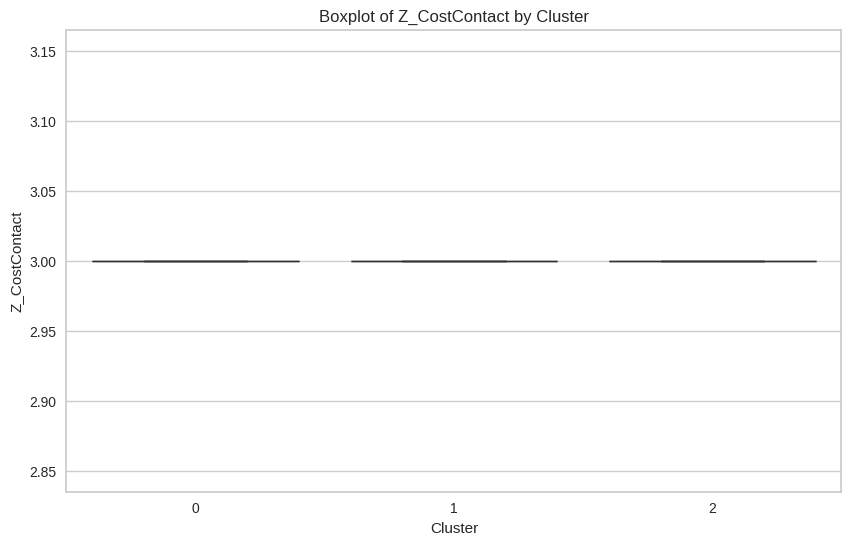

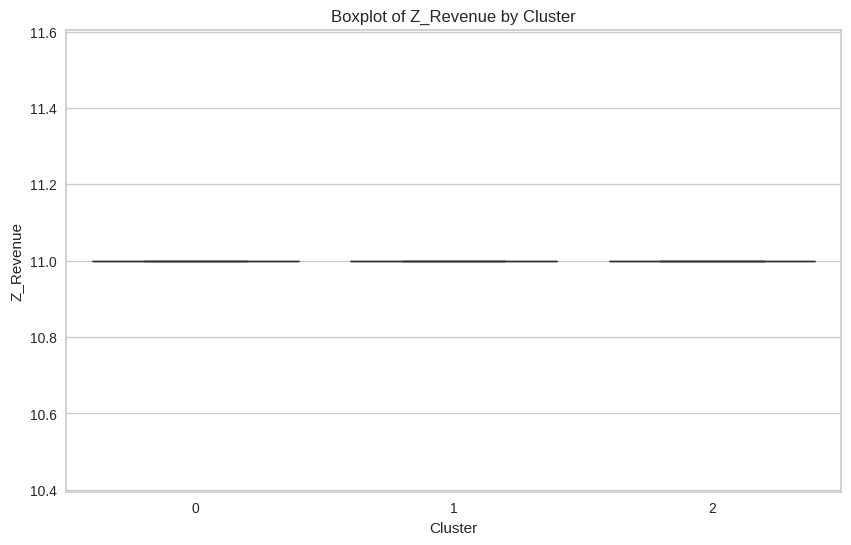

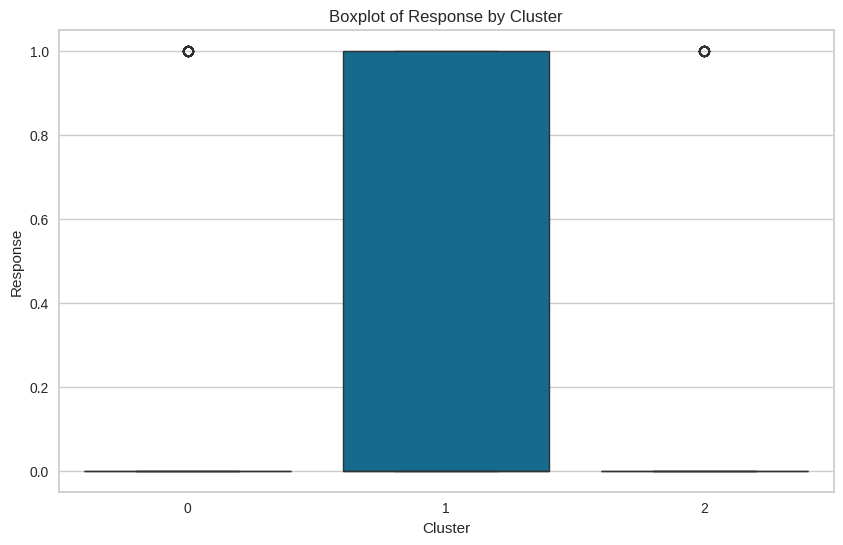

In [36]:
# Write your code here
# Cluster profiling using boxplots

# Select numerical columns for cluster profiling (excluding ID and the new Cluster column)
numerical_cols_for_profiling = data.select_dtypes(include=np.number).columns.drop(['ID', 'Cluster'])

# Create boxplots for each numerical feature, grouped by cluster
for col in numerical_cols_for_profiling:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=data) # Use 'Cluster' column for grouping
    plt.title(f'Boxplot of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

##### **Observations:**

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

In [37]:
# Write your code here
# Cluster profiling using mean and median

# Calculating summary statistics of the original data for each cluster
mean_profile = data.groupby('Cluster')[numerical_cols_for_profiling].mean()
median_profile = data.groupby('Cluster')[numerical_cols_for_profiling].median()

# Combine mean and median profiles
df_kmeans_profile = pd.concat([mean_profile, median_profile], axis=0)

# Rename index for clarity
df_kmeans_profile.index = [f'Cluster {i} Mean' for i in range(mean_profile.shape[0])] + \
                          [f'Cluster {i} Median' for i in range(median_profile.shape[0])]

# Display the transposed profile
display(df_kmeans_profile.T)

,Cluster 0 Mean,Cluster 1 Mean,Cluster 2 Mean,Cluster 0 Median,Cluster 1 Median,Cluster 2 Median
Year_Birth,1971.614723,1968.710623,1964.351852,1973.0,1970.0,1965.0
Income,35118.329843,77742.410266,58414.682115,34668.5,77089.5,58631.5
Kidhome,0.805927,0.040293,0.200617,1.0,0.0,0.0
Teenhome,0.448375,0.139194,0.908951,0.0,0.0,1.0
Recency,49.608987,49.772894,47.743827,49.0,53.0,48.0
MntWines,43.267686,617.104396,460.831790,22.0,563.0,393.0
MntFruits,4.950287,68.578755,25.146605,2.0,54.0,15.0
MntMeatProducts,23.767686,472.443223,140.668210,15.0,431.0,119.0
MntFishProducts,6.971319,100.826007,33.509259,3.0,93.0,19.0
MntSweetProducts,5.001912,70.527473,26.050926,2.0,57.5,14.0


##### **Observations:**

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

In [1]:
#
Based on the cluster analysis, here are some business recommendations:

**Cluster 0 (High Spenders / Loyal Customers):**
*   **Characteristics:** This segment appears to be the most valuable. They have the highest average income, spend significantly more across all product categories (especially Wine, Meat, and Gold), and are highly engaged, participating in more campaigns and making more purchases across all channels (Web, Catalog, Store). They also have a higher average number of visits to the website.
*   **Recommendations:**
    *   **VIP Program:** Develop an exclusive loyalty program for this segment with special discounts, early access to new products, personalized offers, and dedicated customer service.
    *   **Personalized Marketing:** Tailor marketing messages to highlight premium products, exclusive deals, and benefits of being a loyal customer.
    *   **Cross-selling:** Promote complementary high-value products based on their past purchase behavior (e.g., pairing high-end wines with gourmet meat).
    *   **Customer Retention:** Focus heavily on retaining these customers as they contribute the most to revenue. Gather feedback to understand their needs and improve their experience.

**Cluster 1 (Moderate Spenders / Younger Families):**
*   **Characteristics:** This segment seems to have a lower average income compared to Cluster 0 and has a significant number of children and teenagers at home. Their spending is moderate across categories, with relatively lower spending on Wine and Gold. They show moderate engagement with campaigns and make a balanced number of purchases across different channels.
*   **Recommendations:**
    *   **Family-Oriented Marketing:** Design marketing campaigns that resonate with families, highlighting products suitable for children and teenagers, or offering family-sized bundles and deals.
    *   **Value-Based Offers:** Focus on value propositions, discounts, and promotions that appeal to budget-conscious families.
    *   **Convenience:** Emphasize the convenience of shopping through different channels (web, catalog, store) to fit their busy lifestyles.
    *   **Targeted Product Recommendations:** Recommend products that are popular among other families or offer relevant promotions on items they are more likely to purchase (e.g., snacks, casual wear).

**Cluster 2 (Lower Spenders / Less Engaged):**
*   **Characteristics:** This segment has the lowest average income and the lowest spending across all product categories. They also show less engagement with campaigns and make fewer purchases across all channels. They might be newer customers or less active buyers.
*   **Recommendations:**
    *   **Customer Onboarding:** If they are new customers, focus on a strong onboarding experience to educate them about the brand, product offerings, and loyalty programs.
    *   **Introductory Offers:** Provide attractive introductory offers or discounts to encourage initial purchases and engagement.
    *   **Re-engagement Campaigns:** Implement targeted campaigns to re-engage inactive customers in this segment, perhaps using personalized emails or limited-time promotions.
    *   **Gather Feedback:** Try to understand why they are less engaged or spending less. Surveys or feedback forms could provide valuable insights into potential barriers or preferences.

**General Recommendations:**

*   **Personalization across Channels:** Tailor the website experience, email content, and in-store promotions based on the identified cluster.
*   **Campaign Optimization:** Analyze the response rates to past campaigns for each cluster to understand which types of campaigns are most effective for each group.
*   **Inventory Management:** Use the spending patterns of the clusters to optimize inventory levels for different product categories and store locations.
*   **Pricing Strategies:** Consider differential pricing or promotional strategies based on the price sensitivity of each cluster.

By implementing these recommendations, the company can move towards a more personalized and effective marketing strategy, leading to improved customer satisfaction, higher conversion rates, and increased revenue.

SyntaxError: invalid syntax (ipython-input-1-631715471.py, line 3)

# Task
Analyze the customer data in "Mall_Customers.csv" to perform customer segmentation using K-means clustering, profile the resulting clusters, and provide business recommendations based on the analysis.

##### **Observations (Question 10 - Boxplots):**

*   **Cluster 0:** This cluster shows significantly higher spending across almost all product categories, particularly Wine, Meat Products, Fish Products, and Sweet Products. They also have higher numbers of web and catalog purchases, and higher income. The distribution of 'Recency' appears similar across clusters. 'Kidhome' and 'Teenhome' values are generally lower in this cluster. They also seem to respond more positively to campaigns 1 and 5.
*   **Cluster 1:** This cluster appears to have a lower income and higher numbers of children ('Kidhome'). Their spending is generally lower across all product categories compared to Cluster 0 and 2. They have a higher number of deal purchases and web visits. Campaign responses are generally low.
*   **Cluster 2:** This cluster has moderate to high income, fewer young children ('Kidhome') but more teenagers ('Teenhome'). Their spending on Wine, Meat, and Fish is higher than Cluster 1 but generally lower than Cluster 0. They have a higher number of store purchases and similar web visits to Cluster 0. Their response rates to campaigns are mixed, with some positive response to campaigns 3 and 4.

##### **Observations (Question 11 - Mean and Median Profiles):**

The mean and median profiles confirm the observations from the boxplots:

*   **Cluster 0 (Mean/Median):** Highest average and median income. Highest average and median spending across most categories (Wines, Fruits, Meat, Fish, Sweets, Gold). Higher average and median web and catalog purchases, lower Kidhome and Teenhome. Higher response rates to campaigns 1 and 5.
*   **Cluster 1 (Mean/Median):** Lowest average and median income. Lower average and median spending across most categories. Higher average and median Kidhome. Higher average and median deal purchases and web visits. Lower campaign response rates.
*   **Cluster 2 (Mean/Median):** Moderate to high average and median income. Higher average and median Teenhome and lower Kidhome compared to Cluster 1. Spending on Wine, Meat, and Fish is between Cluster 0 and 1. Higher average and median store purchases. Mixed campaign response rates.

These profiles clearly highlight the distinct characteristics of each customer segment based on their demographics, income, and purchasing behavior.

## **Business Recommendations (Question 12)**

Based on the cluster analysis, here are some business recommendations:

**Cluster 0 (High-Value Engaged Customers):**
*   **Characteristics:** This segment represents the most profitable customers. They have high income, high spending across various categories (especially Wine, Meat, and Gold), and are actively engaged through web and catalog purchases and campaign responses.
*   **Recommendations:**
    *   **VIP Loyalty Program:** Create an exclusive loyalty program with premium benefits, personalized offers on high-value products, early access to sales, and dedicated customer service to retain these valuable customers.
    *   **Personalized Marketing:** Tailor marketing campaigns to their preferences, focusing on premium products and exclusive experiences. Leverage web and catalog channels where they are more active.
    *   **Cross-selling Opportunities:** Recommend complementary high-margin products based on their past purchases (e.g., gourmet food pairings with wine).

**Cluster 1 (Value-Conscious Families):**
*   **Characteristics:** This segment is characterized by lower income and the presence of young children. They are more sensitive to deals and primarily engage through web visits and deal purchases. Their spending is lower across most categories.
*   **Recommendations:**
    *   **Family-Focused Promotions:** Offer discounts, bundles, and promotions on products relevant to families with young children.
    *   **Value-Based Marketing:** Emphasize affordability and value in marketing messages.
    *   **Optimize Deal Strategy:** Analyze which types of deals are most effective for this segment and tailor future promotions accordingly.
    *   **Improve Web Experience:** Enhance the website's usability and mobile experience to cater to their preferred shopping channel.

**Cluster 2 (Families with Teenagers / Store Shoppers):**
*   **Characteristics:** This segment has moderate to high income and a higher presence of teenagers. They show a preference for in-store purchases and have moderate spending habits, particularly in Wine, Meat, and Fish. Their campaign responses are mixed.
*   **Recommendations:**
    *   **Targeted In-Store Promotions:** Offer promotions and product placements in stores that appeal to families with teenagers.
    *   **Product Recommendations:** Focus on recommending products in categories where they show moderate spending (Wine, Meat, Fish) and potentially introduce new products relevant to teenagers.
    *   **Explore Campaign Preferences:** Conduct A/B testing on different types of campaigns to understand what resonates best with this segment.
    *   **Enhance In-Store Experience:** Improve the in-store shopping experience to encourage continued loyalty.

**Overall Recommendations:**

*   **Data-Driven Personalization:** Use the cluster assignments to personalize marketing messages, product recommendations, and offers across all customer touchpoints.
*   **Channel Optimization:** Allocate marketing resources and tailor strategies based on each cluster's preferred shopping channels (Web, Catalog, Store).
*   **Customer Lifecycle Management:** Develop specific strategies for onboarding, engagement, and retention for each cluster.

## **Finish task**

We have successfully loaded and explored the customer data, handled missing values and duplicates, performed exploratory data analysis, applied K-means clustering to segment the customers, profiled the resulting clusters, and provided business recommendations based on the analysis. The clusters reveal distinct customer segments with varying income levels, family compositions, spending habits, and engagement levels. These insights can be used by the retail company to develop targeted marketing strategies, improve customer satisfaction, and optimize business operations.